# Applying Data Science EDA

## Merge Data

In [2]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics

### Data Overview

In [58]:
# import data into a pandas dataframe
df = pd.read_csv("Final_v1.csv", encoding="utf-8", sep=',')
df

id  loan_amnt  term  grade  home_ownership  pymnt_plan  purpose  \
0        1590374    35000.0    36      1               1           1        1   
1        2477367     4925.0    36      2               2           1        2   
2        1690344    31200.0    60      4               1           1        2   
3        2214910     5400.0    36      3               3           1        2   
4        1578408    17500.0    60      5               3           1        2   
...          ...        ...   ...    ...             ...         ...      ...   
174274  41760700     5000.0    36      5               3           1        3   
174275  40715544    16000.0    36      2               1           1        2   
174276  66590706    12000.0    60      3               3           1        2   
174277  52280403    24000.0    36      1               1           1        8   
174278  68514852    21000.0    36      3               1           1        2   

        inq_last_6mths  pub_rec  revol_bal  ...  emp_length  installment  \
0                  2.0      0.0    56977.0  ...         6.0      1111.37   
1                  0.0      0.0     4011.0  ...         7.0       169.12   
2                  3.0      0.0    26508.0  ...         0.0       861.36   
3                  1.0      0.0    26384.0  ...         0.0       184.80   
4                  0.0      0.0    17791.0  ...         0.0       451.56   
...                ...      ...        ...  ...         ...          ...   
174274             3.0      7.0     5362.0  ...        10.0       179.69   
174275             1.0      0.0    16394.0  ...         1.0       551.91   
174276             0.0      0.0        0.0  ...         2.0       250.10   
174277             0.0      1.0    55971.0  ...        10.0       722.76   
174278             0.0      0.0   139338.0  ...        10.0       685.33   

        revol_util  hardship_flag  addr_state  issue_year  loan_status  \
0             16.7              1          CA        2012            0   
1             46.1              1          FL        2012            1   
2             33.3              1          CA        2012            0   
3             80.9              1          CA        2012            0   
4             49.6              1          NJ        2012            0   
...            ...            ...         ...         ...          ...   
174274        61.6              1          IN        2015            0   
174275        98.2              1          AZ        2015            0   
174276         0.0              1          NY        2015            0   
174277        38.9              1          TX        2015            0   
174278        76.5              1          MI        2015            0   

        Population 25 years and over with Bachelor degree or higher  \
0                                                    30.9             
1                                                    26.8             
2                                                    30.9             
3                                                    30.9             
4                                                    36.2             
...                                                   ...             
174274                                               24.9             
174275                                               27.7             
174276                                               35.0             
174277                                               28.4             
174278                                               27.8             

        Percent Uninsured  Poverty Rate  
0                    17.9          17.0  
1                    20.1          17.1  
2                    17.9          17.0  
3                    17.9          17.0  
4                    12.7          10.8  
...                   ...           ...  
174274                9.6          14.5  
174275               10.8          17.4  
174276  

In [59]:
# map the state names to codes
state_code_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}

In [60]:
def merge_macroecon_data(df_base, macro_path, new_col_name):
    """
    Merges a macroeconomic indicator into df_base based on state and year.
    
    Parameters:
    - df_base: main DataFrame (e.g., Final_v1.csv loaded as DataFrame)
    - macro_path: path to macroeconomic CSV file
    - new_col_name: name to assign to the merged indicator column
    
    Returns:
    - merged DataFrame with the new column
    """
    df_macro = pd.read_csv(macro_path)

    # Extract year columns (must be digits)
    year_cols = [col for col in df_macro.columns if col.isdigit()]
    df_macro_melted = df_macro.melt(id_vars=["GeoName"], value_vars=year_cols,
                                    var_name="issue_year", value_name=new_col_name)
    df_macro_melted["issue_year"] = df_macro_melted["issue_year"].astype(int)

    df_base = df_base.copy()
    df_base["state_name"] = df_base["addr_state"].map(state_code_to_name)

    merged = df_base.merge(df_macro_melted, how="left",
                           left_on=["state_name", "issue_year"],
                           right_on=["GeoName", "issue_year"])
    
    return merged.drop(columns=["state_name", "GeoName"])

In [61]:
# merge macroecon data
import os

# Apply the function
files = ["Macroecon_data/%Implicit regional price deflator.csv",
         "Macroecon_data/%State Per capital personal consumption expenditures(PCE).csv",
         "Macroecon_data/%State Total employment growth.csv",
         "Macroecon_data/Regional price parities (RPPs) all items.csv",
         "Macroecon_data/State GDP Growth % Summary .csv",
         "Macroecon_data/State Real per capita personal income.csv"]

# 最初のDataFrameを用意（Final_v1.csvなど）
final_df = df.copy()

# すべてのマクロ経済データをマージ
for file_path in files:
    # ファイル名からカラム名を自動生成（拡張子除去・記号除去・小文字化）
    base = os.path.basename(file_path).replace(".csv", "")
    col_name = base.replace("%", "").replace("(", "").replace(")", "").replace(" ", "_").lower()
    
    final_df = merge_macroecon_data(final_df, file_path, new_col_name=col_name)

# print result
final_df.head()

id  loan_amnt  term  grade  home_ownership  pymnt_plan  purpose  \
0  1590374    35000.0    36      1               1           1        1   
1  2477367     4925.0    36      2               2           1        2   
2  1690344    31200.0    60      4               1           1        2   
3  2214910     5400.0    36      3               3           1        2   
4  1578408    17500.0    60      5               3           1        2   

   inq_last_6mths  pub_rec  revol_bal  ...  loan_status  \
0             2.0      0.0    56977.0  ...            0   
1             0.0      0.0     4011.0  ...            1   
2             3.0      0.0    26508.0  ...            0   
3             1.0      0.0    26384.0  ...            0   
4             0.0      0.0    17791.0  ...            0   

   Population 25 years and over with Bachelor degree or higher  \
0                                               30.9             
1                                               26.8             
2                                               30.9             
3                                               30.9             
4                                               36.2             

   Percent Uninsured  Poverty Rate  implicit_regional_price_deflator  \
0               17.9          17.0                               2.0   
1               20.1          17.1                               2.1   
2               17.9          17.0                               2.0   
3               17.9          17.0                               2.0   
4               12.7          10.8                               2.0   

   state_per_capital_personal_consumption_expenditurespce  \
0                                                3.2        
1                                                2.6        
2                                                3.2        
3                                                3.2        
4                                                2.3        

   state_total_employment_growth  regional_price_parities_rpps_all_items  \
0                            3.4                                 109.649   
1                            2.1                                 101.046   
2                            3.4                                 109.649   
3                            3.4                                 109.649   
4                            0.7                                 109.420   

   state_gdp_growth__summary_  state_real_per_capita_personal_income  
0                         2.9                                46169.0  
1                         1.0                                43201.0  
2                         2.9                                46169.0  
3                         2.9                                46169.0  
4                         2.2                                52502.0  

[5 rows x 40 columns]

In [62]:
# mearge interest rate
interest_rate_df = pd.read_csv("Macroecon_data/fed_interest_rate_2012_2019.csv")

final_df = final_df.merge(interest_rate_df, how="left",
                              left_on=["issue_year"],
                              right_on=["year"])

final_df = final_df.drop(columns=["year"])
final_df

id  loan_amnt  term  grade  home_ownership  pymnt_plan  purpose  \
0        1590374    35000.0    36      1               1           1        1   
1        2477367     4925.0    36      2               2           1        2   
2        1690344    31200.0    60      4               1           1        2   
3        2214910     5400.0    36      3               3           1        2   
4        1578408    17500.0    60      5               3           1        2   
...          ...        ...   ...    ...             ...         ...      ...   
174274  41760700     5000.0    36      5               3           1        3   
174275  40715544    16000.0    36      2               1           1        2   
174276  66590706    12000.0    60      3               3           1        2   
174277  52280403    24000.0    36      1               1           1        8   
174278  68514852    21000.0    36      3               1           1        2   

        inq_last_6mths  pub_rec  revol_bal  ...  \
0                  2.0      0.0    56977.0  ...   
1                  0.0      0.0     4011.0  ...   
2                  3.0      0.0    26508.0  ...   
3                  1.0      0.0    26384.0  ...   
4                  0.0      0.0    17791.0  ...   
...                ...      ...        ...  ...   
174274             3.0      7.0     5362.0  ...   
174275             1.0      0.0    16394.0  ...   
174276             0.0      0.0        0.0  ...   
174277             0.0      1.0    55971.0  ...   
174278             0.0      0.0   139338.0  ...   

        Population 25 years and over with Bachelor degree or higher  \
0                                                    30.9             
1                                                    26.8             
2                                                    30.9             
3                                                    30.9             
4                                                    36.2             
...                                                   ...             
174274                                               24.9             
174275                                               27.7             
174276                                               35.0             
174277                                               28.4             
174278                                               27.8             

        Percent Uninsured  Poverty Rate  implicit_regional_price_deflator  \
0                    17.9          17.0                               2.0   
1                    20.1          17.1                               2.1   
2                    17.9          17.0                               2.0   
3                    17.9          17.0                               2.0   
4                    12.7          10.8                               2.0   
...                   ...           ...                               ...   
174274                9.6          14.5                              -1.1   
174275               10.8          17.4                               0.1   
174276                7.1          15.4                               0.8   
174277               17.1          15.9                               0.0   
174278                6.1          15.8                              -1.7   

        state_per_capital_personal_consumption_expenditurespce  \
0                                                     3.2        
1                                                     2.6        
2                                                     3.2        
3                                                     3.2        
4                                                     2.3        
...                                                   ...        
174274                                                2.2        
174275                                                2.6        
174276                                                2.

In [63]:
unemp_df = pd.read_csv("Macroecon_data/%state_unemployment_2012_2019.csv")

# Extract year columns (must be digits)
year_cols = [col for col in unemp_df.columns if col.isdigit()]
unemp_df_melted = unemp_df.melt(id_vars=["state"], value_vars=year_cols,
                                    var_name="issue_year", value_name="unemployment_rate")
unemp_df_melted["issue_year"] = unemp_df_melted["issue_year"].astype(int)

#df_base["state_name"] = df_base["addr_state"].map(state_code_to_name)

final_df = final_df.merge(unemp_df_melted, how="left",
                           left_on=["addr_state", "issue_year"],
                           right_on=["state", "issue_year"])

final_df = final_df.drop(columns=["state"])
final_df

id  loan_amnt  term  grade  home_ownership  pymnt_plan  purpose  \
0        1590374    35000.0    36      1               1           1        1   
1        2477367     4925.0    36      2               2           1        2   
2        1690344    31200.0    60      4               1           1        2   
3        2214910     5400.0    36      3               3           1        2   
4        1578408    17500.0    60      5               3           1        2   
...          ...        ...   ...    ...             ...         ...      ...   
174274  41760700     5000.0    36      5               3           1        3   
174275  40715544    16000.0    36      2               1           1        2   
174276  66590706    12000.0    60      3               3           1        2   
174277  52280403    24000.0    36      1               1           1        8   
174278  68514852    21000.0    36      3               1           1        2   

        inq_last_6mths  pub_rec  revol_bal  ...  Percent Uninsured  \
0                  2.0      0.0    56977.0  ...               17.9   
1                  0.0      0.0     4011.0  ...               20.1   
2                  3.0      0.0    26508.0  ...               17.9   
3                  1.0      0.0    26384.0  ...               17.9   
4                  0.0      0.0    17791.0  ...               12.7   
...                ...      ...        ...  ...                ...   
174274             3.0      7.0     5362.0  ...                9.6   
174275             1.0      0.0    16394.0  ...               10.8   
174276             0.0      0.0        0.0  ...                7.1   
174277             0.0      1.0    55971.0  ...               17.1   
174278             0.0      0.0   139338.0  ...                6.1   

        Poverty Rate  implicit_regional_price_deflator  \
0               17.0                               2.0   
1               17.1                               2.1   
2               17.0                               2.0   
3               17.0                               2.0   
4               10.8                               2.0   
...              ...                               ...   
174274          14.5                              -1.1   
174275          17.4                               0.1   
174276          15.4                               0.8   
174277          15.9                               0.0   
174278          15.8                              -1.7   

        state_per_capital_personal_consumption_expenditurespce  \
0                                                     3.2        
1                                                     2.6        
2                                                     3.2        
3                                                     3.2        
4                                                     2.3        
...                                                   ...        
174274                                                2.2        
174275                                                2.6        
174276                                                2.4        
174277                                                2.4        
174278                                                3.2        

        state_total_employment_growth  regional_price_parities_rpps_all_items  \
0                                 3.4                                 109.649   
1                                 2.1                                 101.046   
2                                 3.4                                 109.649   
3                                 3.4                                 109.649   
4                                 0.7                                 109.420   
...                               ...                                     ...   
174274                            1.5                                  91.483   
174275                            2.9                         

In [64]:
# export to csv
final_df.to_csv("Final_v2.csv", index=False)

# create a df for processed data
df_processed = final_df.copy()

## Explatory Data Analysis

In [65]:
df = final_df.copy()

#### Check NaN

In [66]:
# Count NaN values in each column
nan_count = df.isna().sum()
print(nan_count)

id                                                               0
loan_amnt                                                        0
term                                                             0
grade                                                            0
home_ownership                                                   0
pymnt_plan                                                       0
purpose                                                          0
inq_last_6mths                                                   0
pub_rec                                                          0
revol_bal                                                        0
total_acc                                                        0
initial_list_status                                              0
recoveries                                                       0
last_fico_range_high                                             0
last_fico_range_low                                           

In [67]:
# impute NaN with mean 
df["unemployment_rate"] = df["unemployment_rate"].fillna(df["unemployment_rate"].mean())
nan_count = df.isna().sum()
print(nan_count)

# update the values of df_processed
df_processed["unemployment_rate"] = df["unemployment_rate"]

id                                                             0
loan_amnt                                                      0
term                                                           0
grade                                                          0
home_ownership                                                 0
pymnt_plan                                                     0
purpose                                                        0
inq_last_6mths                                                 0
pub_rec                                                        0
revol_bal                                                      0
total_acc                                                      0
initial_list_status                                            0
recoveries                                                     0
last_fico_range_high                                           0
last_fico_range_low                                            0
acc_now_delinq           

In [68]:
# check columns names
df.columns

Index(['id', 'loan_amnt', 'term', 'grade', 'home_ownership', 'pymnt_plan',
       'purpose', 'inq_last_6mths', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'recoveries', 'last_fico_range_high',
       'last_fico_range_low', 'acc_now_delinq', 'acc_open_past_24mths',
       'chargeoff_within_12_mths', 'num_bc_sats', 'debt_settlement_flag',
       'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'emp_length',
       'installment', 'revol_util', 'hardship_flag', 'addr_state',
       'issue_year', 'loan_status',
       'Population 25 years and over with Bachelor degree or higher',
       'Percent Uninsured', 'Poverty Rate', 'implicit_regional_price_deflator',
       'state_per_capital_personal_consumption_expenditurespce',
       'state_total_employment_growth',
       'regional_price_parities_rpps_all_items', 'state_gdp_growth__summary_',
       'state_real_per_capita_personal_income', 'avg_interest_rate',
       'unemployment_rate'],
      dtype='object')

In [69]:
# check the types of the data entries
df.dtypes

id                                                               int64
loan_amnt                                                      float64
term                                                             int64
grade                                                            int64
home_ownership                                                   int64
pymnt_plan                                                       int64
purpose                                                          int64
inq_last_6mths                                                 float64
pub_rec                                                        float64
revol_bal                                                      float64
total_acc                                                      float64
initial_list_status                                              int64
recoveries                                                     float64
last_fico_range_high                                           float64
last_f

In [70]:
# check continuos and categorical variables
def classify_variables(df, threshold=20):
    """
    Classifies variables in a DataFrame as discrete (categorical) or continuous based on unique values.

    Parameters:
    - df: Pandas DataFrame
    - threshold: The maximum number of unique values for a variable to be considered discrete.

    Returns:
    - discrete_vars: List of discrete (categorical) variables.
    - continuous_vars: List of continuous variables.
    """
    discrete_vars = []
    continuous_vars = []

    for col in df.select_dtypes(include=['number']).columns:  # only numeric columns
        unique_count = df[col].nunique()
        
        if unique_count <= threshold:
            discrete_vars.append(col)
        else:
            continuous_vars.append(col)

    return discrete_vars, continuous_vars

In [73]:
# run the function
discrete_vars, continuous_vars = classify_variables(df)
discrete_vars = discrete_vars + ["addr_state"]
continuous_vars.remove("id")

print("Discrete Variables:", discrete_vars)
print("Continuous Variables:", continuous_vars)

Discrete Variables: ['term', 'grade', 'home_ownership', 'pymnt_plan', 'purpose', 'inq_last_6mths', 'pub_rec', 'initial_list_status', 'acc_now_delinq', 'chargeoff_within_12_mths', 'debt_settlement_flag', 'emp_length', 'hardship_flag', 'issue_year', 'loan_status', 'avg_interest_rate', 'addr_state']
Continuous Variables: ['loan_amnt', 'revol_bal', 'total_acc', 'recoveries', 'last_fico_range_high', 'last_fico_range_low', 'acc_open_past_24mths', 'num_bc_sats', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'installment', 'revol_util', 'Population 25 years and over with Bachelor degree or higher', 'Percent Uninsured', 'Poverty Rate', 'implicit_regional_price_deflator', 'state_per_capital_personal_consumption_expenditurespce', 'state_total_employment_growth', 'regional_price_parities_rpps_all_items', 'state_gdp_growth__summary_', 'state_real_per_capita_personal_income', 'unemployment_rate']


#### Summary stats

In [74]:
# drop non-numaric column to generate 
df_num = df.copy()
df_num = df_num[continuous_vars]
print(df_num)

# Create a dataframe to accomodate the summary stats
sdep = pd.DataFrame(columns=['Var', 'Mean', 'SD','Min','Max'],
index=range(df_num.shape[1]))

        loan_amnt  revol_bal  total_acc  recoveries  last_fico_range_high  \
0         35000.0    56977.0       33.0        0.00                 779.0   
1          4925.0     4011.0       14.0      306.42                 594.0   
2         31200.0    26508.0       29.0        0.00                 779.0   
3          5400.0    26384.0       32.0        0.00                 594.0   
4         17500.0    17791.0       24.0        0.00                 689.0   
...           ...        ...        ...         ...                   ...   
174274     5000.0     5362.0       19.0        0.00                 529.0   
174275    16000.0    16394.0       25.0        0.00                 664.0   
174276    12000.0        0.0       27.0        0.00                 804.0   
174277    24000.0    55971.0       25.0        0.00                 679.0   
174278    21000.0   139338.0       44.0        0.00                 714.0   

        last_fico_range_low  acc_open_past_24mths  num_bc_sats  annual_inc 

In [75]:
# Generate summary stats
for i in range(df_num.shape[1]):
 sdep.loc[i,'Var'] = df_num.columns[i]
 sdep.loc[i,'Mean'] = round(np.mean(df_num.iloc[:,i]),3)
 sdep.loc[i,'SD'] = round(statistics.stdev(df_num.iloc[:,i]),3)
 sdep.loc[i,'Min'] = round(min(df_num.iloc[:,i]),3)
 sdep.loc[i,'q25'] = round(np.quantile(df_num.iloc[:,i],0.25),3)
 sdep.loc[i,'q50'] = round(np.quantile(df_num.iloc[:,i],0.50),3)
 sdep.loc[i,'q75'] = round(np.quantile(df_num.iloc[:,i],0.75),3)
 sdep.loc[i,'Max'] = round(max(df_num.iloc[:,i]),3)

# Show the result
sdep

Var       Mean         SD  \
0                                           loan_amnt  14819.019   8338.798   
1                                           revol_bal   16916.33  20854.335   
2                                           total_acc     25.324     11.636   
3                                          recoveries    218.135    919.296   
4                                last_fico_range_high    679.004     79.994   
5                                 last_fico_range_low     664.68    122.958   
6                                acc_open_past_24mths      4.277      2.886   
7                                         num_bc_sats       4.73      2.676   
8                                          annual_inc  75276.373  62943.846   
9                                                 dti     17.971      8.067   
10                                     fico_range_low    694.715     29.774   
11                                    fico_range_high    698.715     29.774   
12                                        installment    445.874     244.35   
13                                         revol_util     56.597     23.225   
14  Population 25 years and over with Bachelor deg...     30.615       4.61   
15                                  Percent Uninsured     12.468       4.57   
16                                       Poverty Rate     15.299      2.539   
17                   implicit_regional_price_deflator      1.119      0.869   
18  state_per_capital_personal_consumption_expendi...      2.791      0.767   
19                      state_total_employment_growth      2.086      0.935   
20             regional_price_parities_rpps_all_items    101.295       6.59   
21                         state_gdp_growth__summary_      2.506      1.519   
22              state_real_per_capita_personal_income  47961.108   4455.551   
23                                  unemployment_rate      6.767      1.574   

        Min        Max        q25        q50       q75  
0    1000.0    35000.0   8400.000  13000.000  20000.00  
1       0.0  1743266.0   6856.000  12304.000  21014.50  
2       2.0      150.0     17.000     24.000     32.00  
3       0.0   39444.37      0.000      0.000      0.00  
4       0.0      850.0    629.000    694.000    734.00  
5       0.0      845.0    625.000    690.000    730.00  
6       0.0       53.0      2.000      4.000      6.00  
7       0.0       36.0      3.000      4.000      6.00  
8    3800.0  9000000.0  46000.000  65000.000  90000.00  
9       0.0      64.99     11.910     17.540     23.73  
10    660.0      845.0    670.000    690.000    710.00  
11    664.0      850.0    674.000    694.000    714.00  
12    23.26    1409.99    269.215    395.080    582.11  
13      0.0      177.7     39.900     57.900     74.80  
14     18.6       56.7     27.400     30.900     33.40  
15      2.8       22.5      8.700     12.300     16.60  
16      8.2       22.0     13.600     15.900     17.00  
17     -1.7        5.4      0.600      1.200      1.60  
18      0.1        4.9      2.300      2.700      3.20  
19     -1.6        4.1      1.300      2.000      2.90  
20    87.89    114.291     95.243    100.718    108.99  
21     -4.3        7.7      1.600      2.300      3.80  
22  37951.0    67900.0  45287.000  47588.000  50670.00  
23     2.78       11.5      5.620      6.550      7.78

In [79]:
# create a df for discrete variavles
df_disc = df.copy()
df_disc = df_disc[discrete_vars]
print(df_disc)

        term  grade  home_ownership  pymnt_plan  purpose  inq_last_6mths  \
0         36      1               1           1        1             2.0   
1         36      2               2           1        2             0.0   
2         60      4               1           1        2             3.0   
3         36      3               3           1        2             1.0   
4         60      5               3           1        2             0.0   
...      ...    ...             ...         ...      ...             ...   
174274    36      5               3           1        3             3.0   
174275    36      2               1           1        2             1.0   
174276    60      3               3           1        2             0.0   
174277    36      1               1           1        8             0.0   
174278    36      3               1           1        2             0.0   

        pub_rec  initial_list_status  acc_now_delinq  \
0           0.0                

In [76]:
# function to generate summary stats for categoricals
def categorical_summary(df):
    """
    Computes summary statistics for categorical variables in the DataFrame.

    Parameters:
    - df: Pandas DataFrame containing categorical features.

    Returns:
    - summary_df: Pandas DataFrame with summary statistics.
    """
    # Select categorical columns
    categorical_cols = df.columns

    summary_data = []
    
    for col in categorical_cols:
        unique_count = df[col].nunique()
        most_frequent = df[col].mode()[0] if not df[col].mode().empty else None
        most_frequent_count = df[col].value_counts().iloc[0] if unique_count > 0 else 0
        missing_count = df[col].isnull().sum()
        total_count = len(df[col])
        proportion_most_frequent = most_frequent_count / total_count if total_count > 0 else 0

        summary_data.append({
            "Column": col,
            "Unique Categories": unique_count,
            "Most Frequent Category": most_frequent,
            "Most Frequent Count": most_frequent_count,
            "Proportion of Most Frequent": proportion_most_frequent,
            "Missing Values": missing_count,
            "Missing Proportion": missing_count / total_count if total_count > 0 else 0
        })
    
    summary_df = pd.DataFrame(summary_data)
    
    return summary_df

In [80]:
# get summary stats for categoricals
summary_df = categorical_summary(df_disc)
summary_df

Column  Unique Categories Most Frequent Category  \
0                       term                  2                     36   
1                      grade                  7                      3   
2             home_ownership                  5                      1   
3                 pymnt_plan                  2                      1   
4                    purpose                 13                      2   
5             inq_last_6mths                  9                    0.0   
6                    pub_rec                 20                    0.0   
7        initial_list_status                  2                      1   
8             acc_now_delinq                  4                    0.0   
9   chargeoff_within_12_mths                  8                    0.0   
10      debt_settlement_flag                  2                      1   
11                emp_length                 11                   10.0   
12             hardship_flag                  2                      1   
13                issue_year                  4                   2013   
14               loan_status                  2                      0   
15         avg_interest_rate                  2                   0.25   
16                addr_state                 50                     CA   

    Most Frequent Count  Proportion of Most Frequent  Missing Values  \
0                125553                     0.720414               0   
1                 52605                     0.301844               0   
2                 88693                     0.508914               0   
3                174268                     0.999937               0   
4                104718                     0.600864               0   
5                 93895                     0.538763               0   
6                152012                     0.872234               0   
7                103974                     0.596595               0   
8                173618                     0.996207               0   
9                173086                     0.993155               0   
10               171342                     0.983148               0   
11                60081                     0.344740               0   
12               174266                     0.999925               0   
13                47231                     0.271008               0   
14               145372                     0.834134               0   
15               127594                     0.732125               0   
16                26259                     0.150672               0   

    Missing Proportion  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
5                  0.0  
6                  0.0  
7                  0.0  
8                  0.0  
9                  0.0  
10                 0.0  
11                 0.0  
12                 0.0  
13                 0.0  
14                 0.0  
15                 0.0  
16                 0.0

## Standardization

In [81]:
# import the standardscaler to standardize the data by Z-score normalization
from sklearn.preprocessing import StandardScaler

# define a function to standardize the data
def standardize(df):
    """
    Preprocesses the dataset for Kernel K-Means by applying:
    - Standardization (Z-score normalization)

    Parameters:
    - df: Pandas DataFrame containing the dataset

    Returns:
    - A preprocessed DataFrame
    """
    df_processed = df.copy()
    numeric_cols = df.select_dtypes(include=['number']).columns

    # Standardize all numerical columns
    scaler = StandardScaler()
    df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

    return df_processed

In [82]:
# create a new dataframe
df_num_processed = standardize(df_num)
df_num_processed

# update the values of df_processed
df_processed[continuous_vars] = df_num_processed[continuous_vars]

In [83]:
df_processed

id  loan_amnt  term  grade  home_ownership  pymnt_plan  purpose  \
0        1590374   2.420138    36      1               1           1        1   
1        2477367  -1.186508    36      2               2           1        2   
2        1690344   1.964435    60      4               1           1        2   
3        2214910  -1.129545    36      3               3           1        2   
4        1578408   0.321508    60      5               3           1        2   
...          ...        ...   ...    ...             ...         ...      ...   
174274  41760700  -1.177514    36      5               3           1        3   
174275  40715544   0.141625    36      2               1           1        2   
174276  66590706  -0.338062    60      3               3           1        2   
174277  52280403   1.100999    36      1               1           1        8   
174278  68514852   0.741234    36      3               1           1        2   

        inq_last_6mths  pub_rec  revol_bal  ...  Percent Uninsured  \
0                  2.0      0.0   1.920981  ...           1.188670   
1                  0.0      0.0  -0.618834  ...           1.670067   
2                  3.0      0.0   0.459938  ...           1.188670   
3                  1.0      0.0   0.453992  ...           1.188670   
4                  0.0      0.0   0.041942  ...           0.050820   
...                ...      ...        ...  ...                ...   
174274             3.0      7.0  -0.554051  ...          -0.627513   
174275             1.0      0.0  -0.025047  ...          -0.364932   
174276             0.0      0.0  -0.811168  ...          -1.174556   
174277             0.0      1.0   1.872742  ...           1.013616   
174278             0.0      0.0   5.870339  ...          -1.393373   

        Poverty Rate  implicit_regional_price_deflator  \
0           0.670027                          1.014557   
1           0.709420                          1.129666   
2           0.670027                          1.014557   
3           0.670027                          1.014557   
4          -1.772318                          1.014557   
...              ...                               ...   
174274     -0.314789                         -2.553811   
174275      0.827598                         -1.172507   
174276      0.039745                         -0.366747   
174277      0.236708                         -1.287616   
174278      0.197315                         -3.244463   

        state_per_capital_personal_consumption_expenditurespce  \
0                                                0.532803        
1                                               -0.249041        
2                                                0.532803        
3                                                0.532803        
4                                               -0.639963        
...                                                   ...        
174274                                          -0.770270        
174275                                          -0.249041        
174276                                          -0.509656        
174277                                          -0.509656        
174278                                           0.532803        

        state_total_employment_growth  regional_price_parities_rpps_all_items  \
0                            1.405274                                1.267696   
1                            0.015412                               -0.037862   
2                            1.405274                                1.267696   
3                            1.405274                                1.267696   
4                           -1.481363                                1.232943   
...                               ...                                     ...   
174274                      -0.626063                               -1.489105   
174275                       0.870712                         

#### Covariance

In [84]:
# display displays the covariance matrix
def display_covariance_matrix(df):
    """
    Computes and displays the covariance matrix of a given DataFrame as a table.
    
    Parameters:
    - df: Pandas DataFrame containing only numerical features.
    
    Returns:
    - None (Displays a DataFrame of the covariance matrix).
    """
    covariance_matrix = df.cov()
    return covariance_matrix

In [85]:
# print the covariance matrix
covariance_matrix = display_covariance_matrix(df_num_processed)
covariance_matrix

loan_amnt  revol_bal  \
loan_amnt                                            1.000006   0.341963   
revol_bal                                            0.341963   1.000006   
total_acc                                            0.224187   0.200998   
recoveries                                           0.176732   0.036732   
last_fico_range_high                                 0.075121   0.073405   
last_fico_range_low                                  0.069355   0.067533   
acc_open_past_24mths                                -0.005694  -0.029198   
num_bc_sats                                          0.207302   0.269766   
annual_inc                                           0.325630   0.290079   
dti                                                  0.037978   0.144697   
fico_range_low                                       0.119753   0.054372   
fico_range_high                                      0.119751   0.054372   
installment                                          0.947482   0.322094   
revol_util                                           0.110153   0.214599   
Population 25 years and over with Bachelor degr...   0.033271   0.046981   
Percent Uninsured                                   -0.031999  -0.039634   
Poverty Rate                                        -0.034319  -0.042120   
implicit_regional_price_deflator                    -0.038043  -0.020006   
state_per_capital_personal_consumption_expendit...   0.003924  -0.003314   
state_total_employment_growth                        0.011134  -0.001979   
regional_price_parities_rpps_all_items               0.007430   0.026491   
state_gdp_growth__summary_                           0.014756  -0.001693   
state_real_per_capita_personal_income                0.042562   0.043749   
unemployment_rate                                   -0.060110  -0.027055   

                                                    total_acc  recoveries  \
loan_amnt                                            0.224187    0.176732   
revol_bal                                            0.200998    0.036732   
total_acc                                            1.000006    0.042750   
recoveries                                           0.042750    1.000006   
last_fico_range_high                                 0.053214   -0.277072   
last_fico_range_low                                  0.073237   -0.229844   
acc_open_past_24mths                                 0.405642    0.066878   
num_bc_sats                                          0.360533    0.025109   
annual_inc                                           0.191842    0.024425   
dti                                                  0.225577    0.054338   
fico_range_low                                       0.030293   -0.052667   
fico_range_high                                      0.030292   -0.052667   
installment                                          0.203147    0.154213   
revol_util                                          -0.105666    0.039501   
Population 25 years and over with Bachelor degr...  -0.025202   -0.006326   
Percent Uninsured                                   -0.018974   -0.008154   
Poverty Rate                                        -0.013565    0.003914   
implicit_regional_price_deflator                    -0.024390   -0.011022   
state_per_capital_personal_consumption_expendit...  -0.005952    0.006830   
state_total_employment_growth                       -0.045810    0.001852   
regional_price_parities_rpps_all_items              -0.077942   -0.003559   
state_gdp_growth__summary_                          -0.023104    0.002561   
state_real_per_capita_personal_income                0.006351    0.000233   
unemployment_rate                                   -0.072368   -0.021260   

                                                    last_fico_range_high  \
loan_amnt                                                       0.075121   
revol_bal                                                       0.073405 

In [86]:
def plot_filtered_covariance_heatmap(df, threshold=0.5):
    """
    Computes and visualizes the covariance matrix with only high correlations.
    
    Parameters:
    - df: Pandas DataFrame containing only numerical features.
    - threshold: Float, minimum absolute covariance value to be displayed.
    
    Returns:
    - None (Displays a heatmap of the filtered covariance matrix).
    """
    
    # Compute covariance matrix
    covariance_matrix = df.cov()

    # display only the columns beyond the threshold
    mask = np.abs(covariance_matrix) > threshold
    filtered_cov_matrix = covariance_matrix.where(mask)

    plt.figure(figsize=(10, 8))
    sns.heatmap(filtered_cov_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 5})
    plt.title(f"Filtered Covariance Matrix (>|{threshold}|)")
    plt.show()

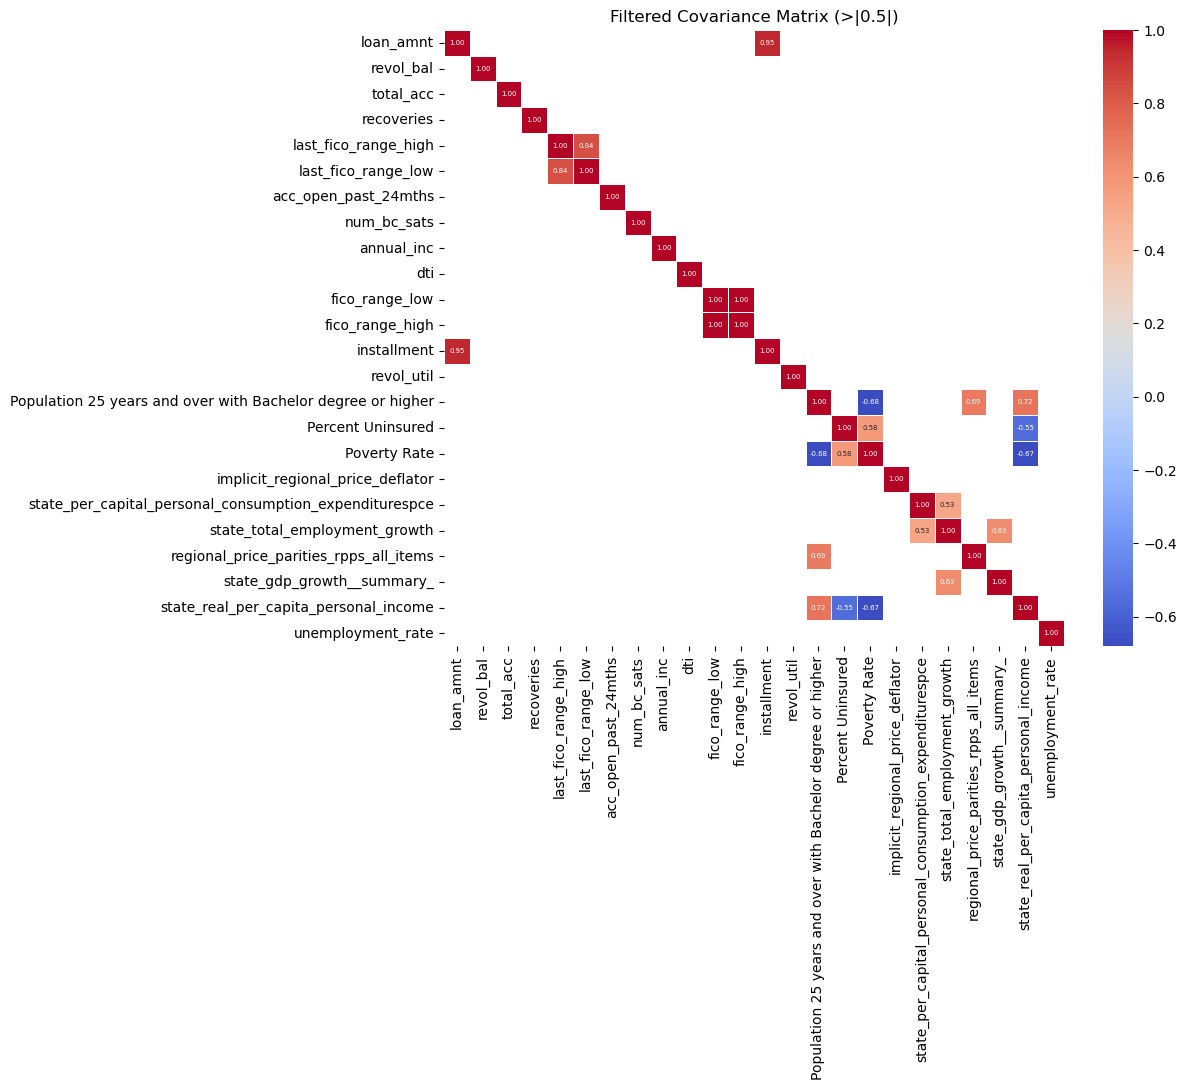

In [87]:
# print the heatmeap (beyond the threshold only)
plot_filtered_covariance_heatmap(df_num_processed, threshold=0.5)

### Handling Inbalanced Data

#### Handle Skewness

In [88]:
# Check skewness for numeric columns
skew_values = df_num_processed.skew()
print(skew_values)

loan_amnt                                                       0.679310
revol_bal                                                      12.495042
total_acc                                                       0.857662
recoveries                                                      9.161141
last_fico_range_high                                           -0.577157
last_fico_range_low                                            -3.291135
acc_open_past_24mths                                            1.265690
num_bc_sats                                                     1.522763
annual_inc                                                     46.378935
dti                                                             0.198030
fico_range_low                                                  1.353052
fico_range_high                                                 1.353237
installment                                                     0.923592
revol_util                                         

In [89]:
# create a dataframe with tranformed values
df_num_transformed = df_num.copy()

log_transform_cols = ["revol_bal", 
                      "recoveries", 
                      "last_fico_range_low", 
                      "acc_open_past_24mths", 
                      "num_bc_sats", 
                      "annual_inc",
                      "fico_range_low",
                      "fico_range_high"]

for col in log_transform_cols:
    df_num_transformed[col] = np.sign(df_num_transformed [col]) * np.log1p(abs(df_num_transformed [col]))  # log(1+x) to avoid log(0) issue

# update the values of df_processed
df_processed[log_transform_cols] = df_num_transformed[log_transform_cols]

# print the result
df_num_transformed

loan_amnt  revol_bal  total_acc  recoveries  last_fico_range_high  \
0         35000.0  10.950421       33.0    0.000000                 779.0   
1          4925.0   8.297045       14.0    5.728215                 594.0   
2         31200.0  10.185240       29.0    0.000000                 779.0   
3          5400.0  10.180551       32.0    0.000000                 594.0   
4         17500.0   9.786504       24.0    0.000000                 689.0   
...           ...        ...        ...         ...                   ...   
174274     5000.0   8.587279       19.0    0.000000                 529.0   
174275    16000.0   9.704732       25.0    0.000000                 664.0   
174276    12000.0   0.000000       27.0    0.000000                 804.0   
174277    24000.0  10.932607       25.0    0.000000                 679.0   
174278    21000.0  11.844665       44.0    0.000000                 714.0   

        last_fico_range_low  acc_open_past_24mths  num_bc_sats  annual_inc  \
0                  6.654153              1.098612     1.386294   11.965281   
1                  6.381816              0.000000     1.386294   10.545368   
2                  6.654153              1.791759     2.079442   11.440366   
3                  6.381816              1.791759     1.609438   11.608245   
4                  6.530878              1.791759     1.945910   10.714440   
...                     ...                   ...          ...         ...   
174274             6.265301              1.791759     1.386294   11.350418   
174275             6.493754              1.386294     1.386294   10.932160   
174276             6.685861              1.386294     1.609438   10.691968   
174277             6.516193              0.693147     1.098612   11.695255   
174278             6.566672              0.693147     1.386294   11.775297   

          dti  ...  \
0       14.67  ...   
1        3.51  ...   
2       10.40  ...   
3       23.23  ...   
4       14.51  ...   
...       ...  ...   
174274  13.37  ...   
174275  31.08  ...   
174276  15.22  ...   
174277  15.02  ...   
174278  32.88  ...   

        Population 25 years and over with Bachelor degree or higher  \
0                                                    30.9             
1                                                    26.8             
2                                                    30.9             
3                                                    30.9             
4                                                    36.2             
...                                                   ...             
174274                                               24.9             
174275                                               27.7             
174276                                               35.0             
174277                                               28.4             
174278                                               27.8             

        Percent Uninsured  Poverty Rate  implicit_regional_price_deflator  \
0                    17.9          17.0                               2.0   
1                    20.1          17.1                               2.1   
2                    17.9          17.0                               2.0   
3                    17.9          17.0                               2.0   
4                    12.7          10.8                               2.0   
...                   ...           ...                               ...   
174274                9.6          14.5                              -1.1   
174275               10.8          17.4                               0.1   
174276                7.1          15.4                               0.8   
174277               17.1          15.9                               0.0   
174278                6.1          15.8                              -1.7   

        state_per_capital_personal_consumption_expenditurespce  \
0                                    

In [90]:
# Check skewness for Grade of Spondylolisthesis
skew_values = df_num_transformed.skew()
print(skew_values)

loan_amnt                                                      0.679310
revol_bal                                                     -2.175723
total_acc                                                      0.857662
recoveries                                                     2.415193
last_fico_range_high                                          -0.577157
last_fico_range_low                                           -6.518879
acc_open_past_24mths                                          -0.545604
num_bc_sats                                                   -0.037060
annual_inc                                                     0.320012
dti                                                            0.198030
fico_range_low                                                 1.215399
fico_range_high                                                1.216268
installment                                                    0.923592
revol_util                                                    -0

In [91]:
df_processed

id  loan_amnt  term  grade  home_ownership  pymnt_plan  purpose  \
0        1590374   2.420138    36      1               1           1        1   
1        2477367  -1.186508    36      2               2           1        2   
2        1690344   1.964435    60      4               1           1        2   
3        2214910  -1.129545    36      3               3           1        2   
4        1578408   0.321508    60      5               3           1        2   
...          ...        ...   ...    ...             ...         ...      ...   
174274  41760700  -1.177514    36      5               3           1        3   
174275  40715544   0.141625    36      2               1           1        2   
174276  66590706  -0.338062    60      3               3           1        2   
174277  52280403   1.100999    36      1               1           1        8   
174278  68514852   0.741234    36      3               1           1        2   

        inq_last_6mths  pub_rec  revol_bal  ...  Percent Uninsured  \
0                  2.0      0.0  10.950421  ...           1.188670   
1                  0.0      0.0   8.297045  ...           1.670067   
2                  3.0      0.0  10.185240  ...           1.188670   
3                  1.0      0.0  10.180551  ...           1.188670   
4                  0.0      0.0   9.786504  ...           0.050820   
...                ...      ...        ...  ...                ...   
174274             3.0      7.0   8.587279  ...          -0.627513   
174275             1.0      0.0   9.704732  ...          -0.364932   
174276             0.0      0.0   0.000000  ...          -1.174556   
174277             0.0      1.0  10.932607  ...           1.013616   
174278             0.0      0.0  11.844665  ...          -1.393373   

        Poverty Rate  implicit_regional_price_deflator  \
0           0.670027                          1.014557   
1           0.709420                          1.129666   
2           0.670027                          1.014557   
3           0.670027                          1.014557   
4          -1.772318                          1.014557   
...              ...                               ...   
174274     -0.314789                         -2.553811   
174275      0.827598                         -1.172507   
174276      0.039745                         -0.366747   
174277      0.236708                         -1.287616   
174278      0.197315                         -3.244463   

        state_per_capital_personal_consumption_expenditurespce  \
0                                                0.532803        
1                                               -0.249041        
2                                                0.532803        
3                                                0.532803        
4                                               -0.639963        
...                                                   ...        
174274                                          -0.770270        
174275                                          -0.249041        
174276                                          -0.509656        
174277                                          -0.509656        
174278                                           0.532803        

        state_total_employment_growth  regional_price_parities_rpps_all_items  \
0                            1.405274                                1.267696   
1                            0.015412                               -0.037862   
2                            1.405274                                1.267696   
3                            1.405274                                1.267696   
4                           -1.481363                                1.232943   
...                               ...                                     ...   
174274                      -0.626063                               -1.489105   
174275                       0.870712                         

### Create Distribution/Visualisation

#### Univariate Data Analysis

In [93]:
# Create a function to perform EDA and generate plots
def eda_visualization(df):
    """
    Visualizes each numerical column in the DataFrame using:
    - KDE plot (for distribution analysis)
    - Histogram (for frequency analysis)
    - Boxplot (for outlier detection)
    """
    numeric_cols = df.select_dtypes(include=['number']).columns

    for col in numeric_cols:
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        # KDE plot to visualize the smooth distribution
        sns.kdeplot(df[col], ax=axes[0], fill=True)
        axes[0].set_title(f'KDE Plot: {col}')
        
        # Histogram to see the data distribution with frequency
        sns.histplot(df[col], bins=30, kde=True, ax=axes[1])
        axes[1].set_title(f'Histogram: {col}')
        
        # Boxplot to detect outliers
        sns.boxplot(x=df[col], ax=axes[2])
        axes[2].set_title(f'Boxplot: {col}')
        
        plt.show()

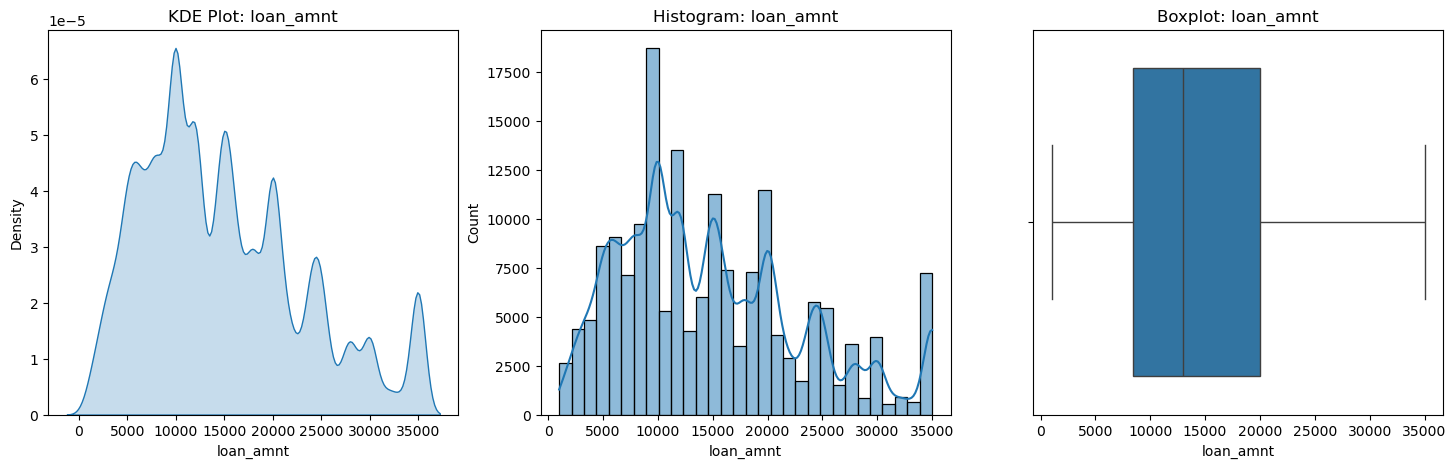

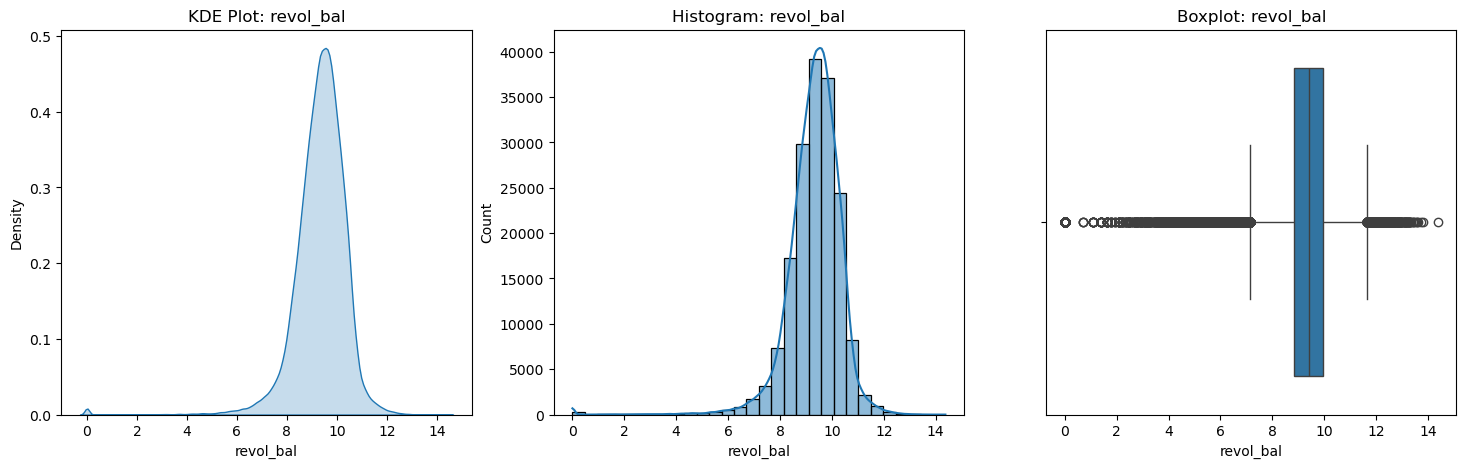

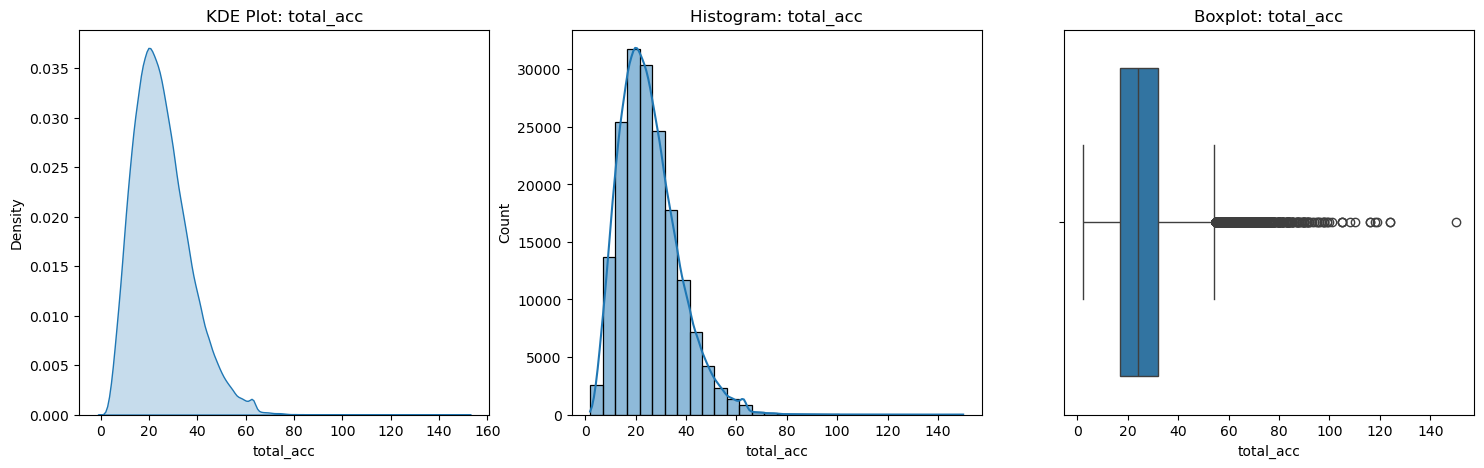

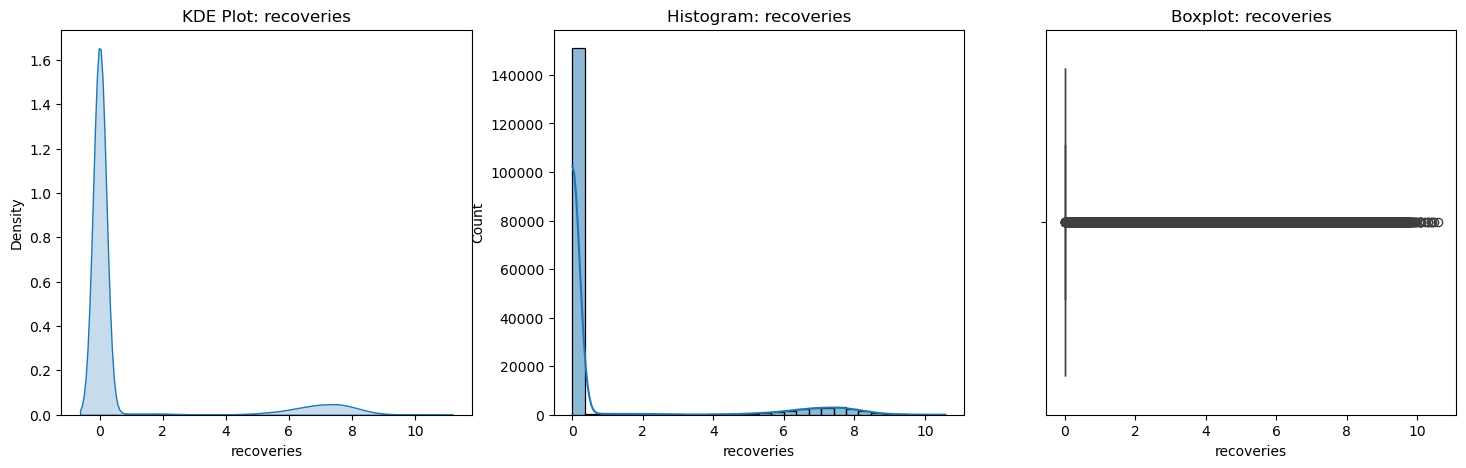

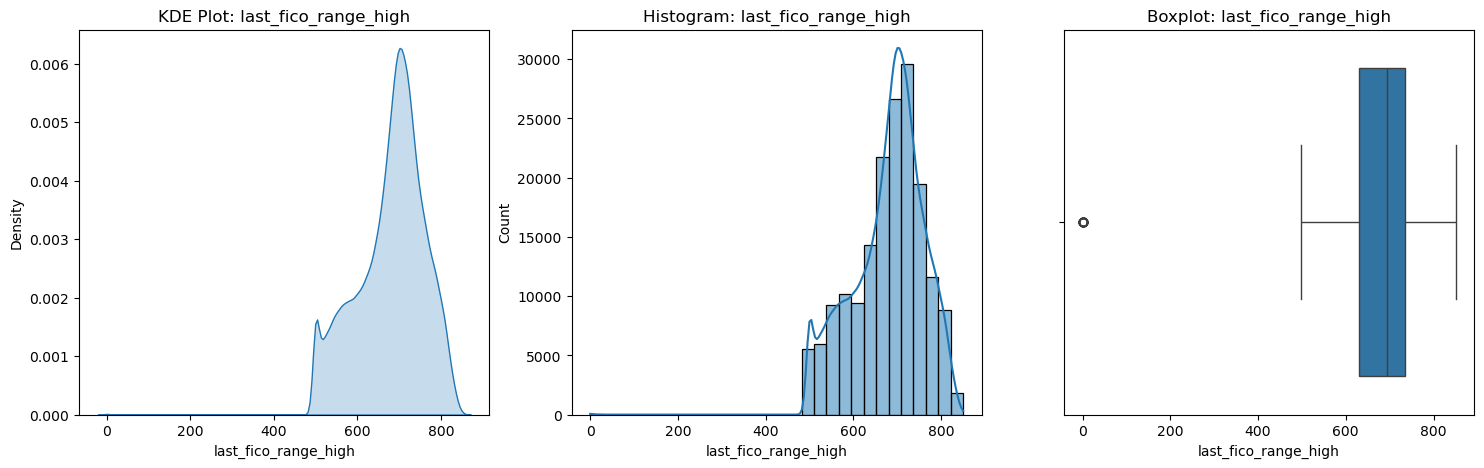

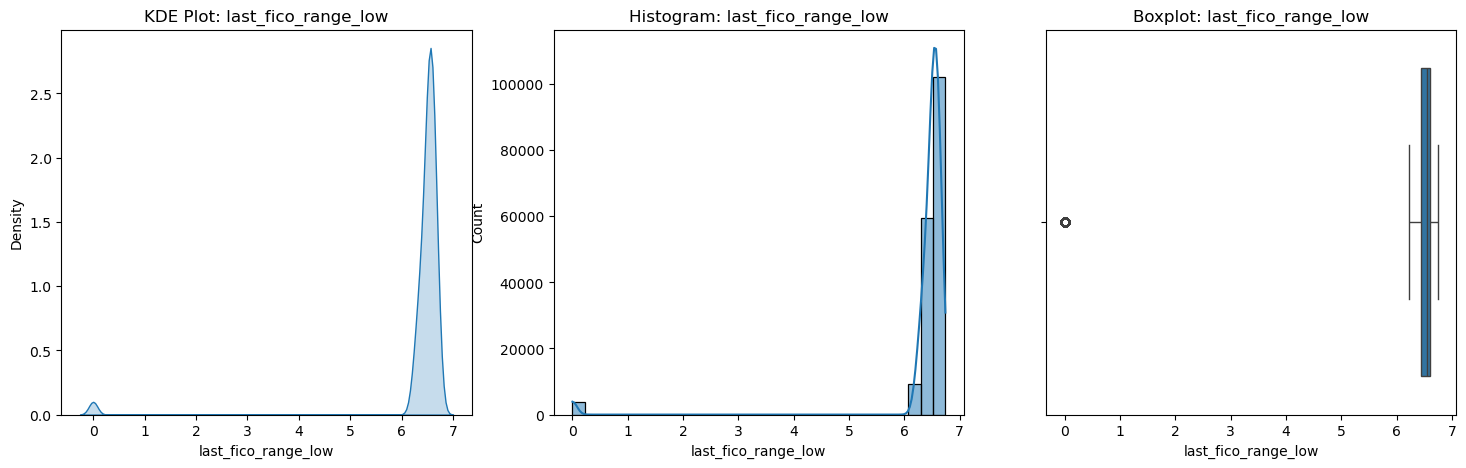

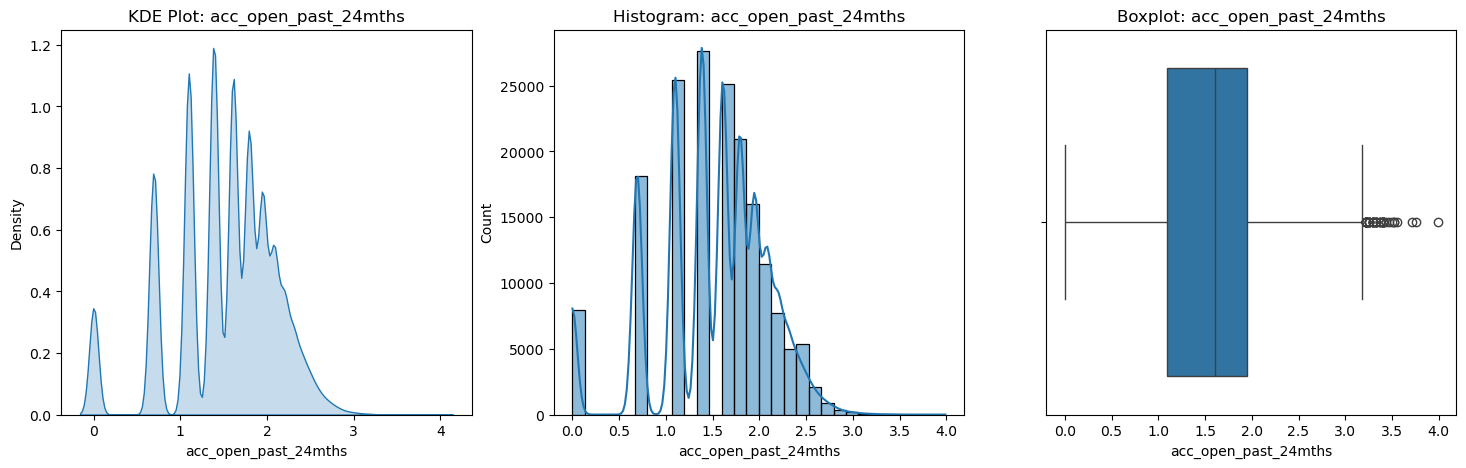

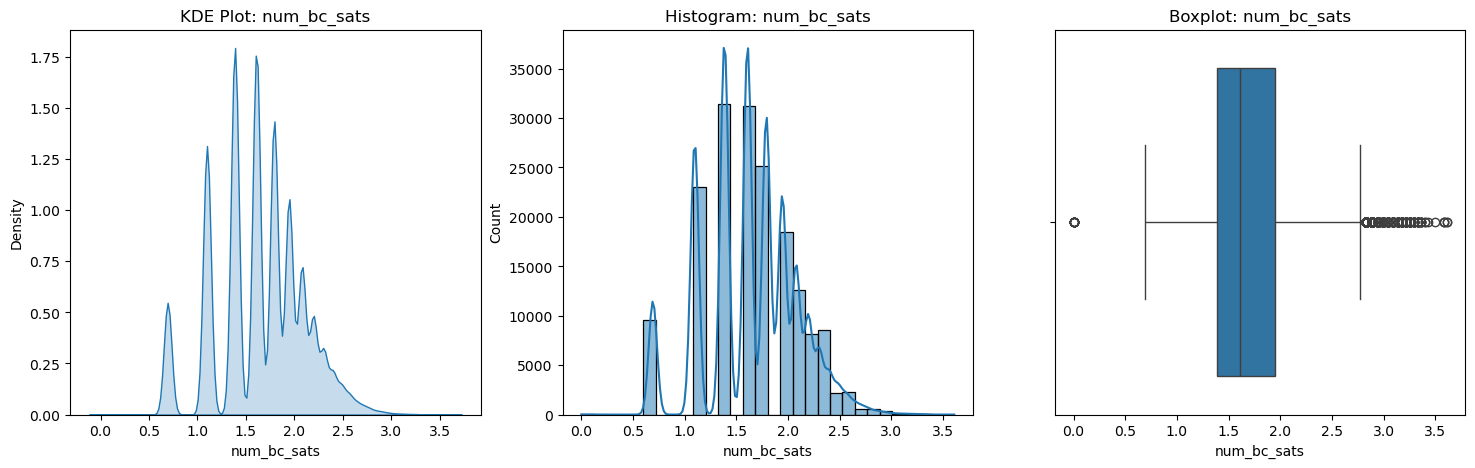

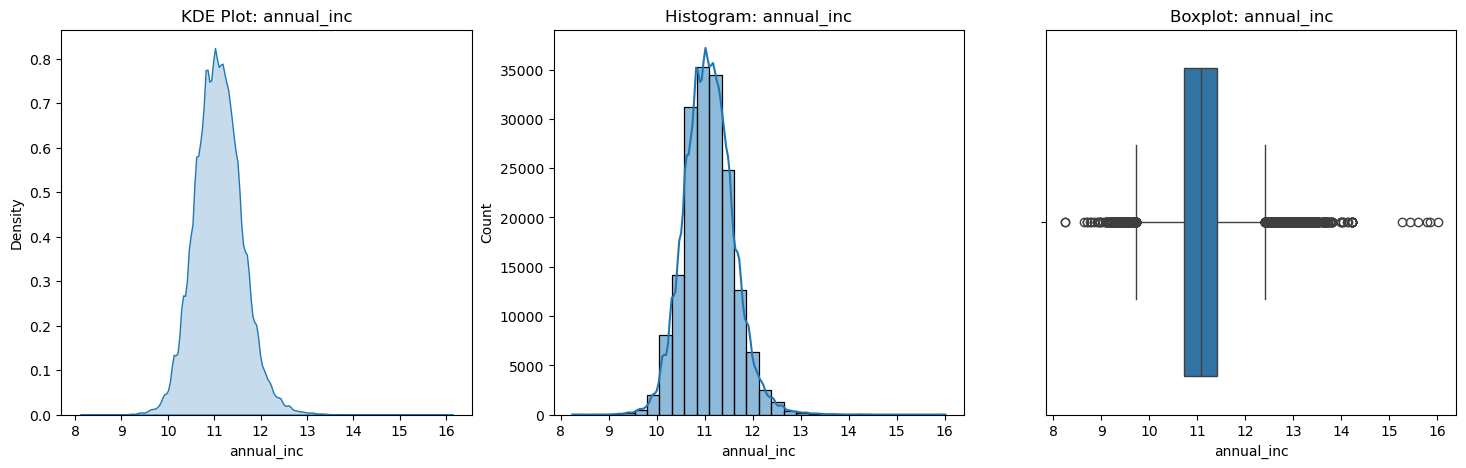

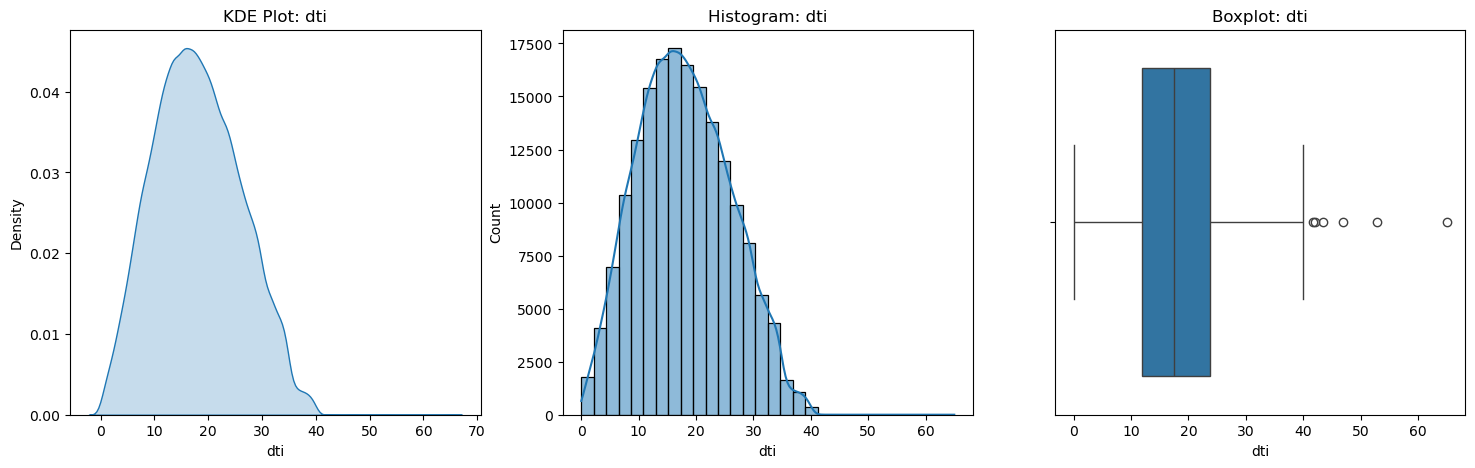

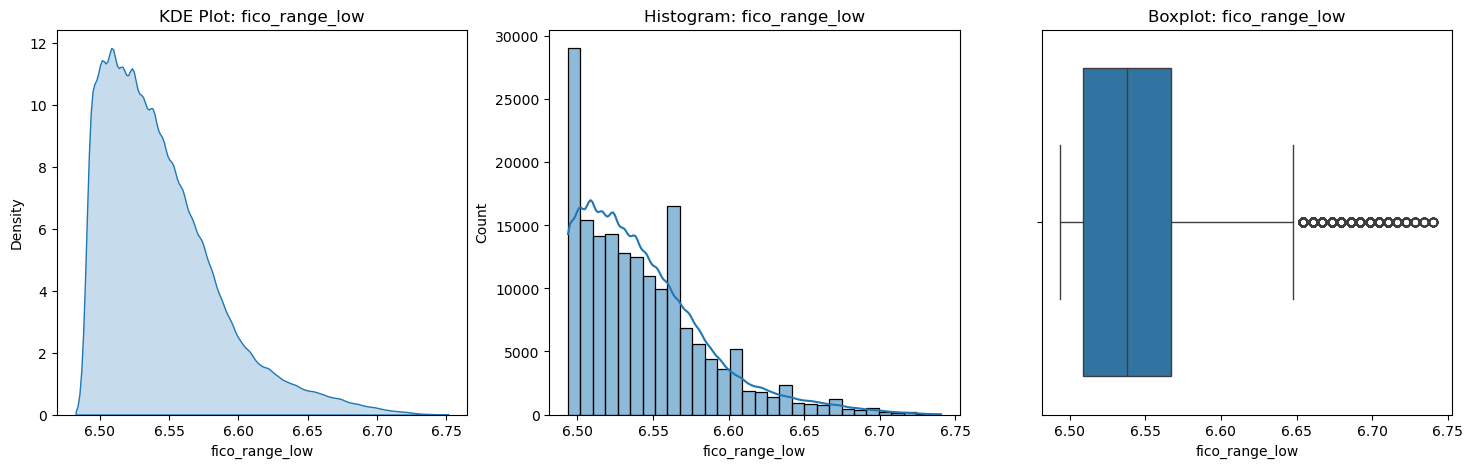

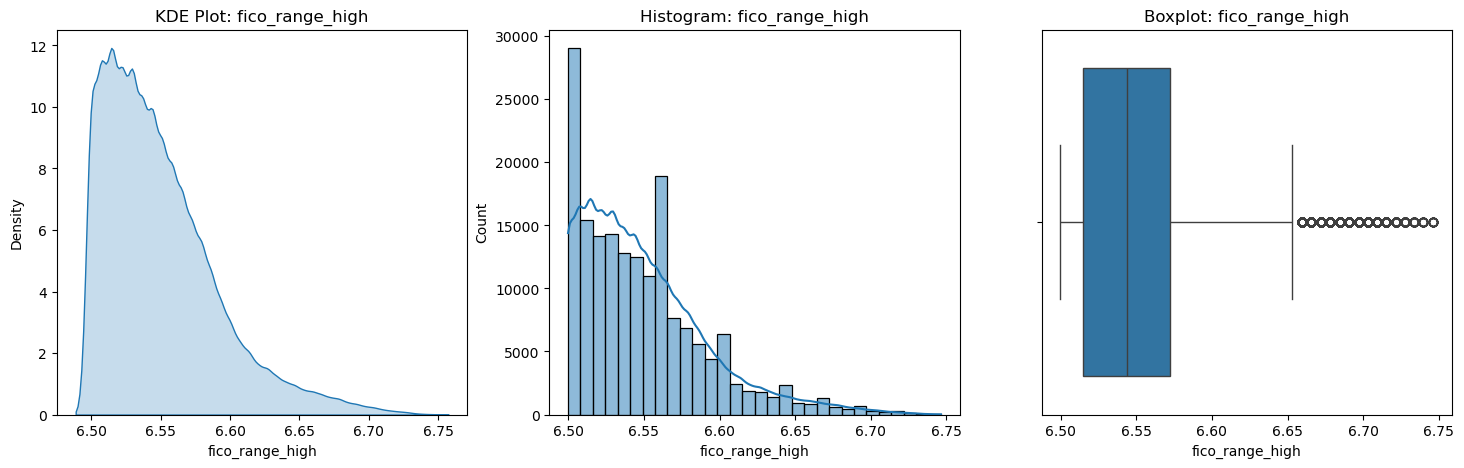

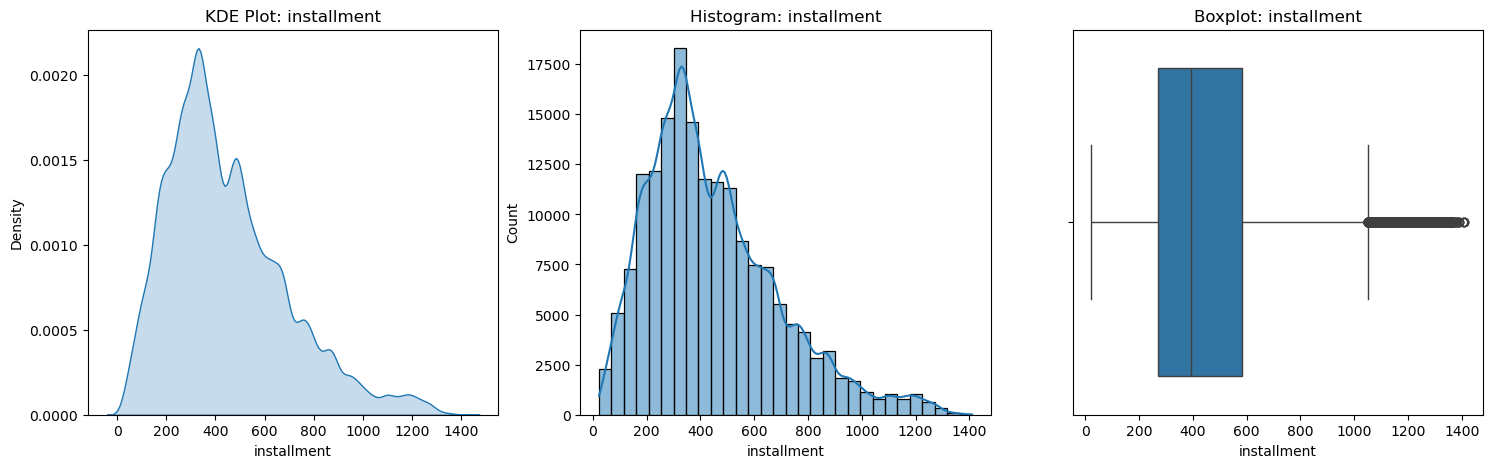

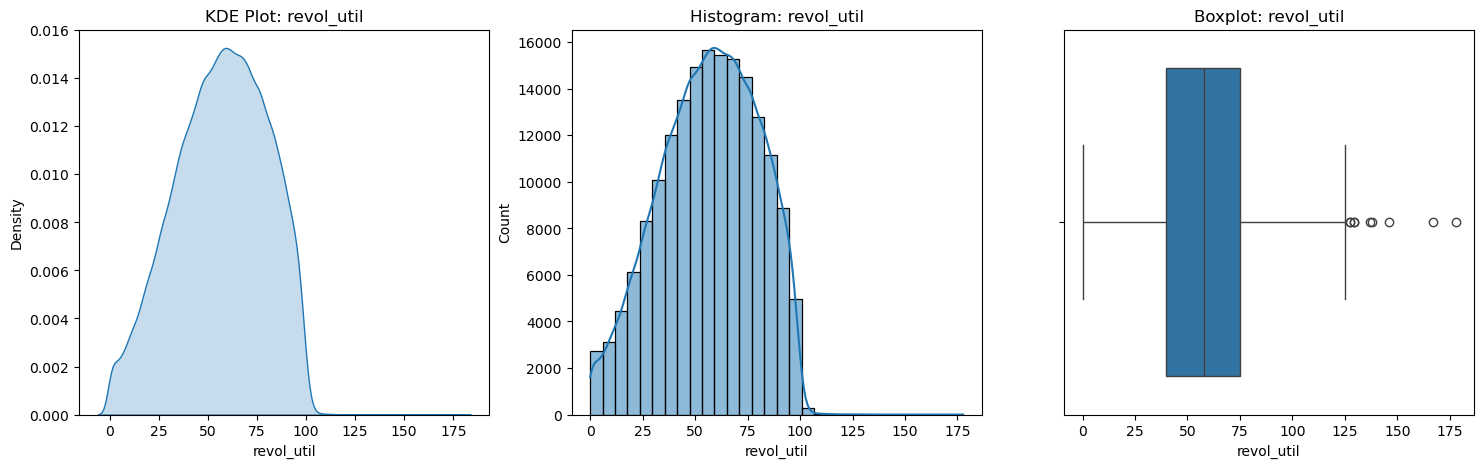

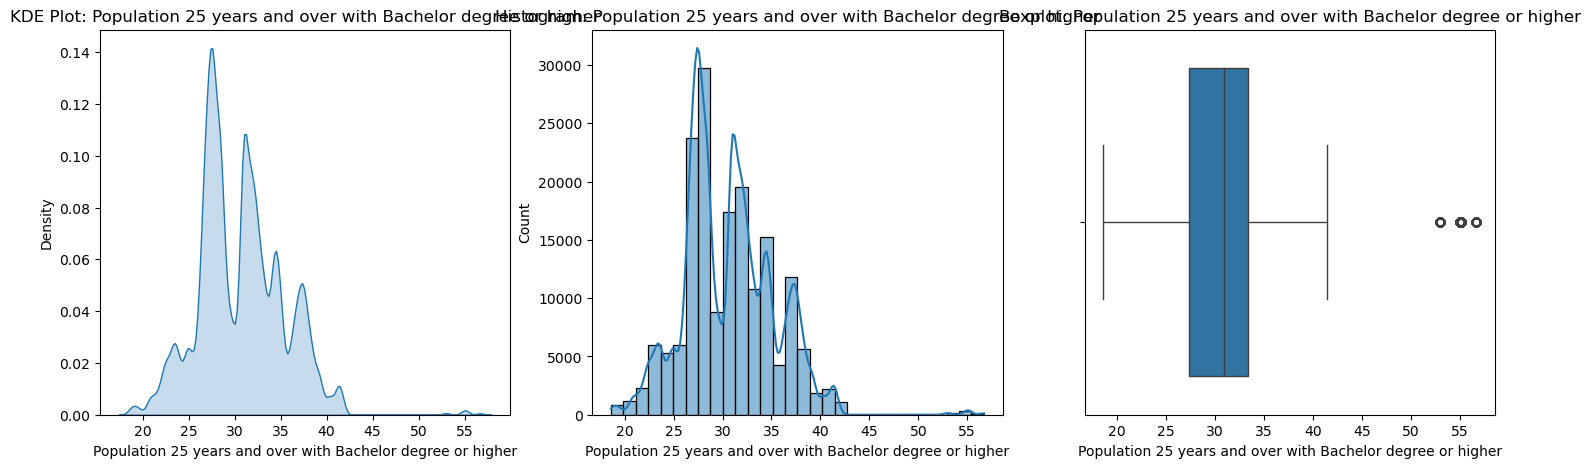

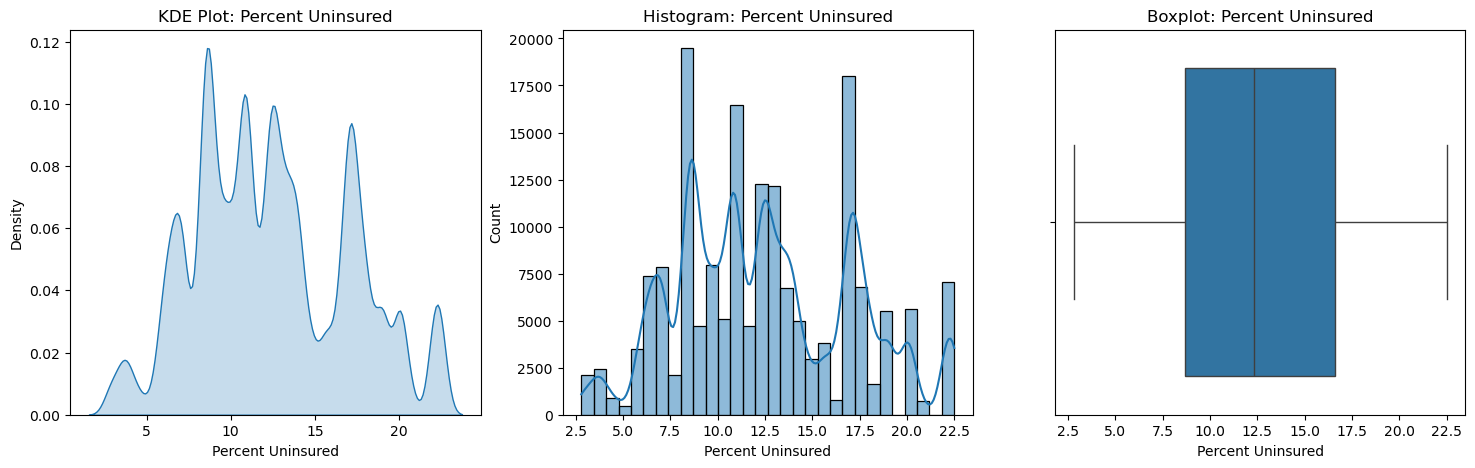

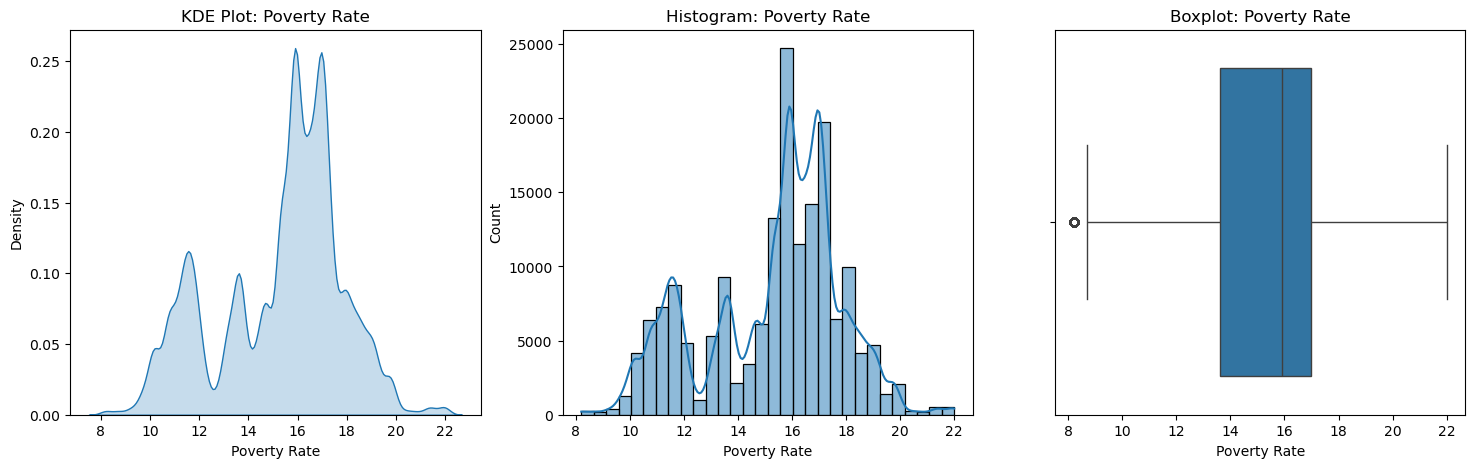

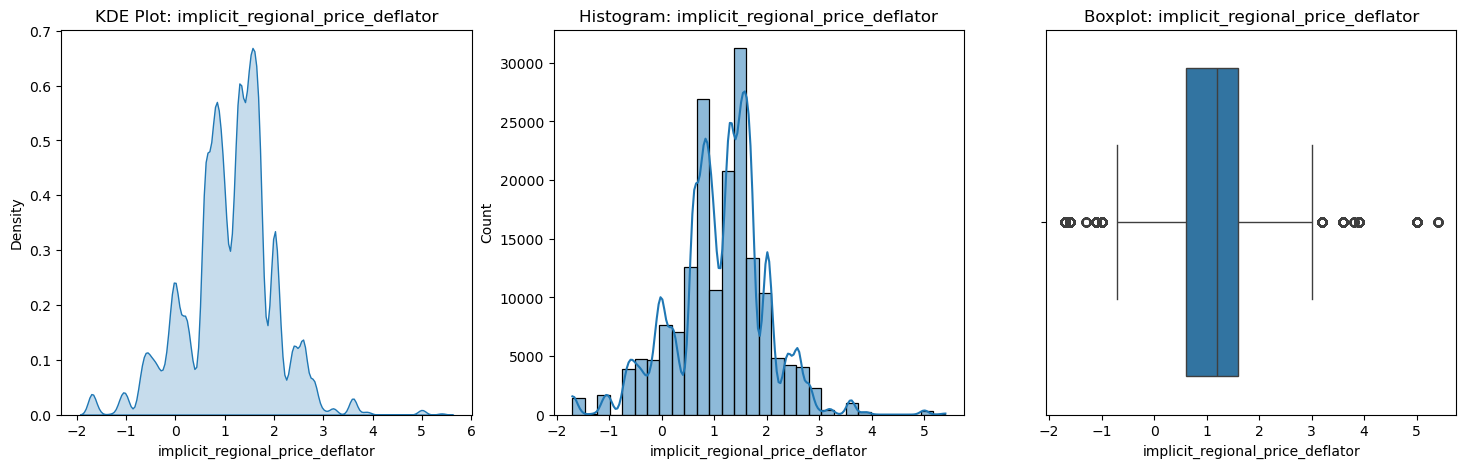

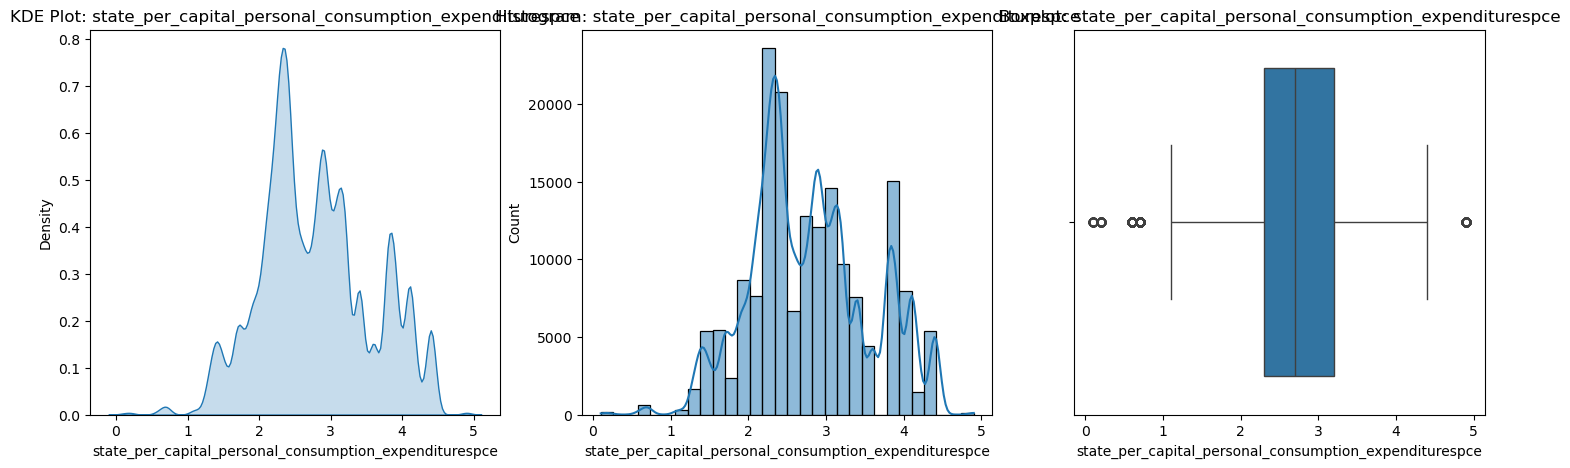

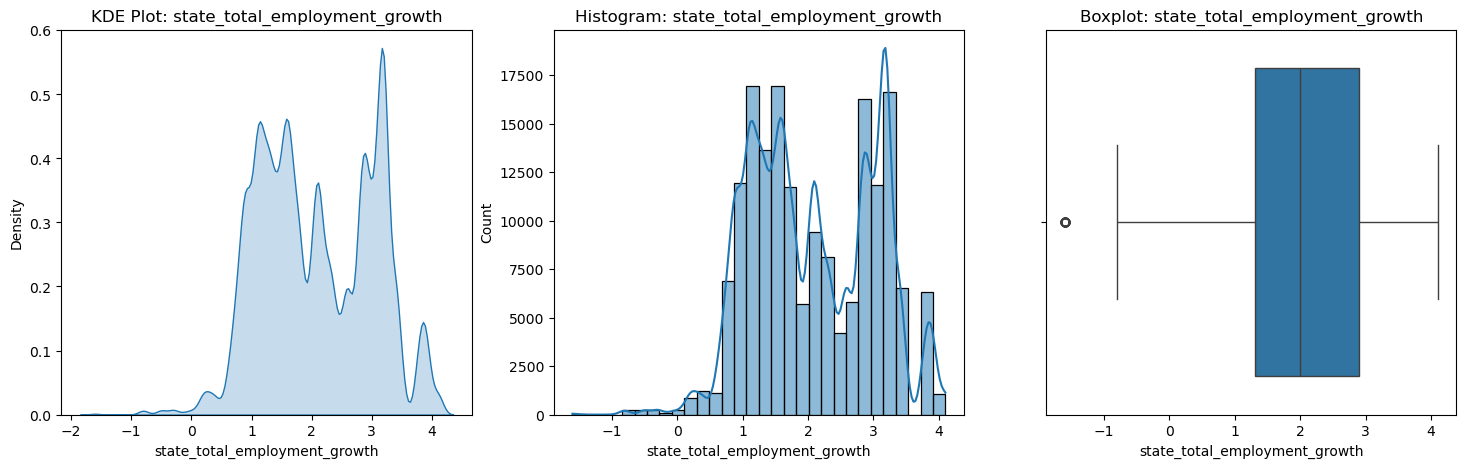

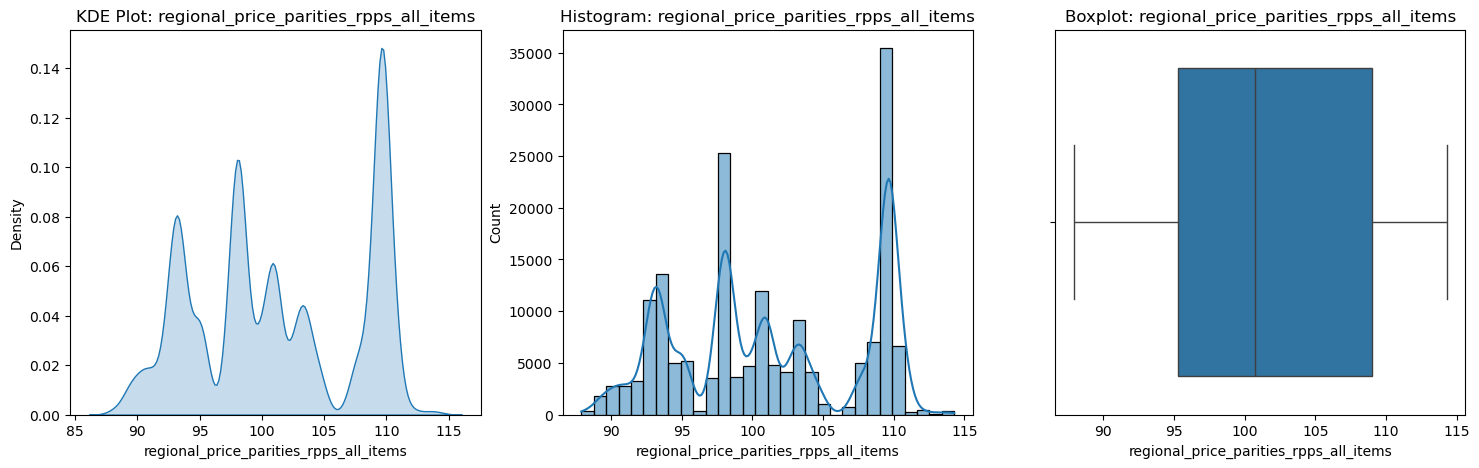

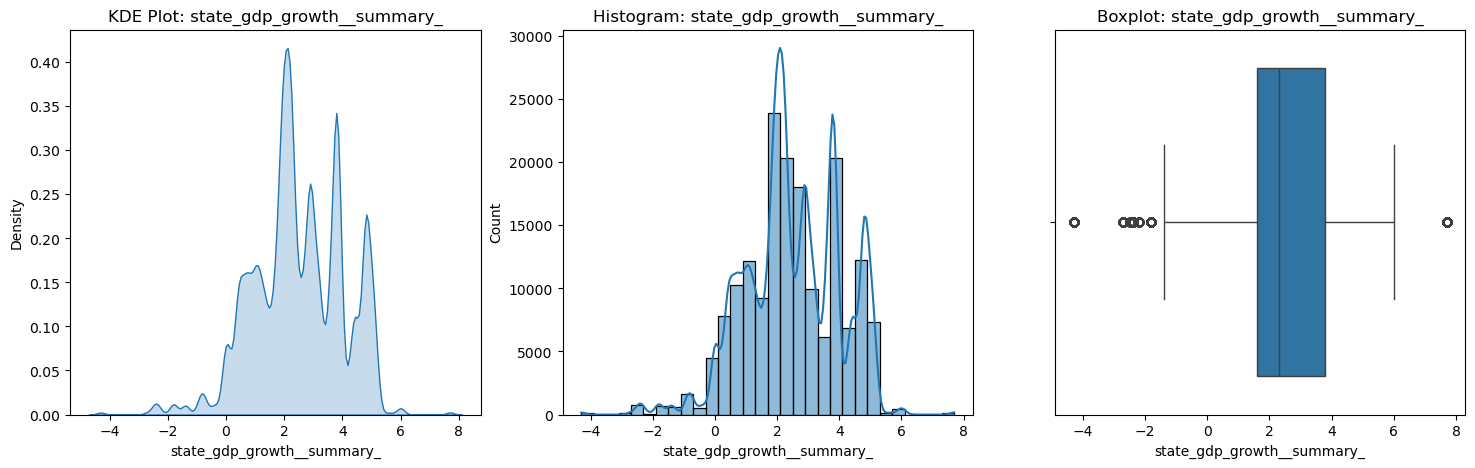

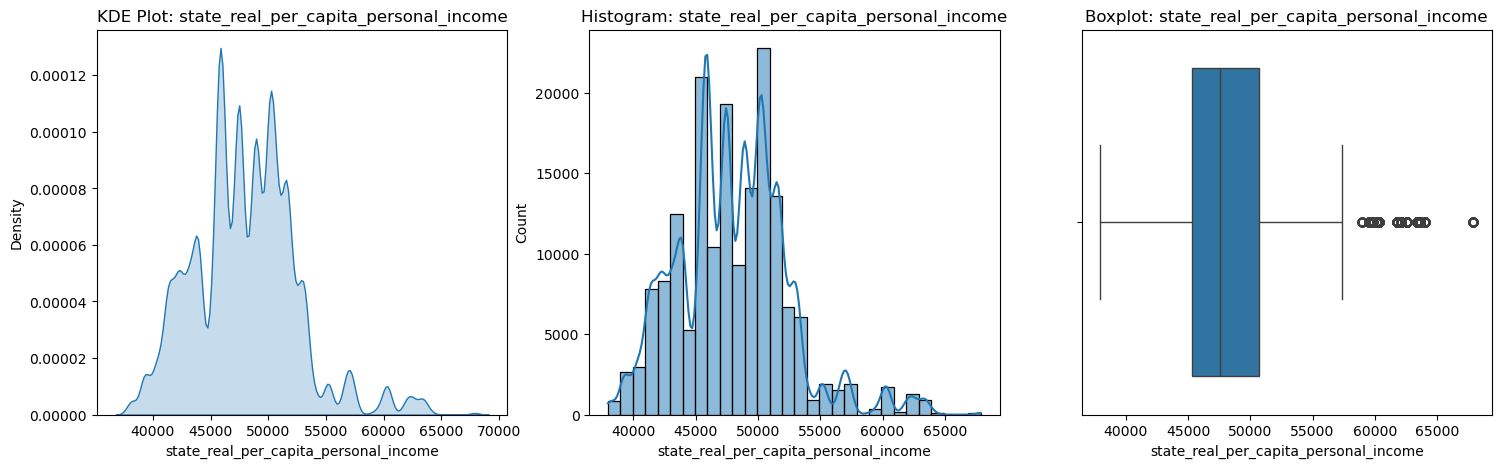

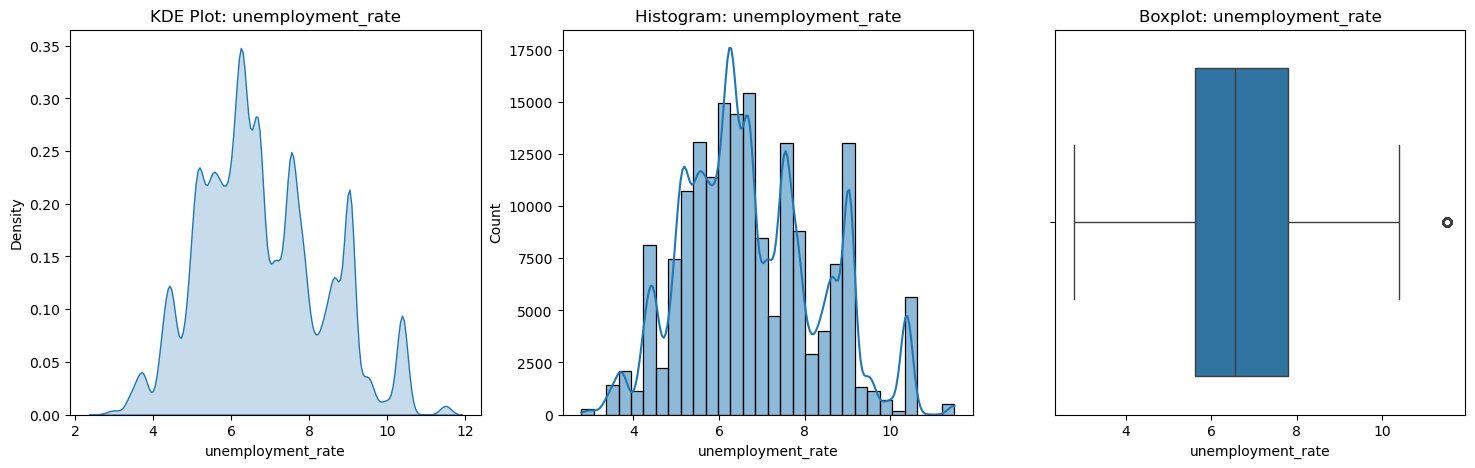

In [94]:
# generate univariate data analysis for numerics
eda_visualization(df_num_transformed)

In [95]:
def eda_categorical_visualization(df):
    """
    Visualizes each categorical column in the DataFrame using:
    - Bar plot (to see category distribution)
    - Pie chart (to see proportion of each category)
    
    Parameters:
    - df: Pandas DataFrame containing categorical features.
    
    Returns:
    - None (Displays plots for categorical variables).
    """
    # Select categorical columns
    categorical_cols = df.columns

    for col in categorical_cols:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))
        
        # Bar plot to visualize category counts
        sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[0])
        axes[0].set_title(f'Bar Plot: {col}')
        
        # Pie chart to visualize proportion
        df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1])
        axes[1].set_title(f'Pie Chart: {col}')
        axes[1].set_ylabel('')  # Hide y-label for better visibility
        
        plt.show()

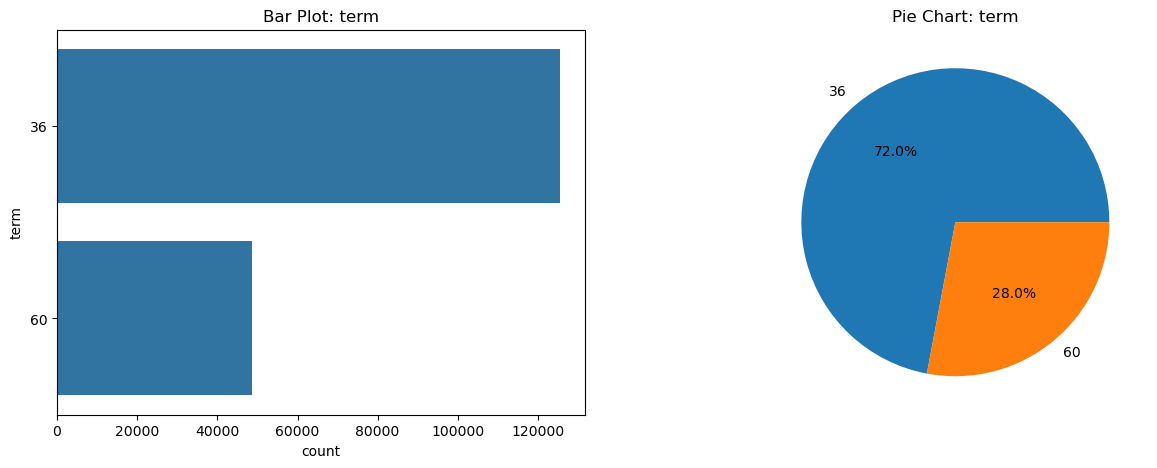

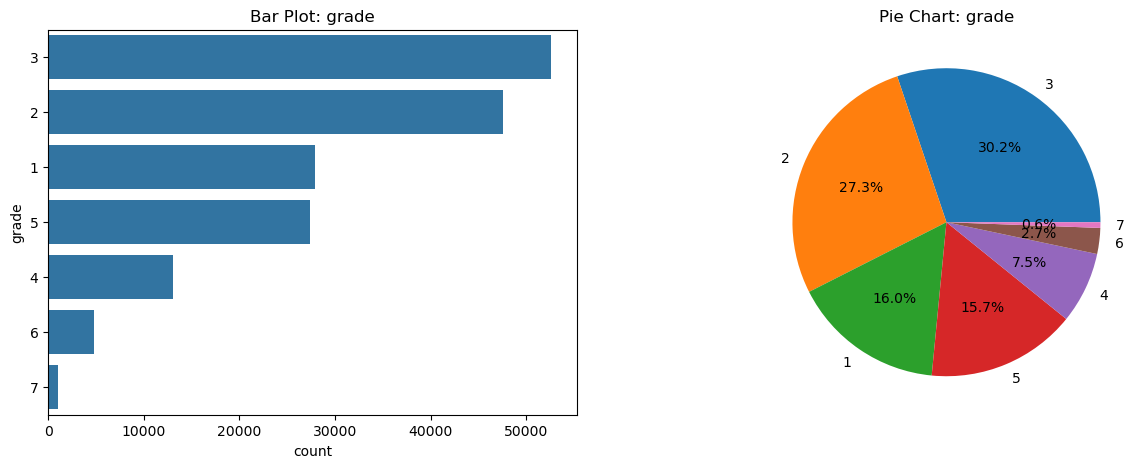

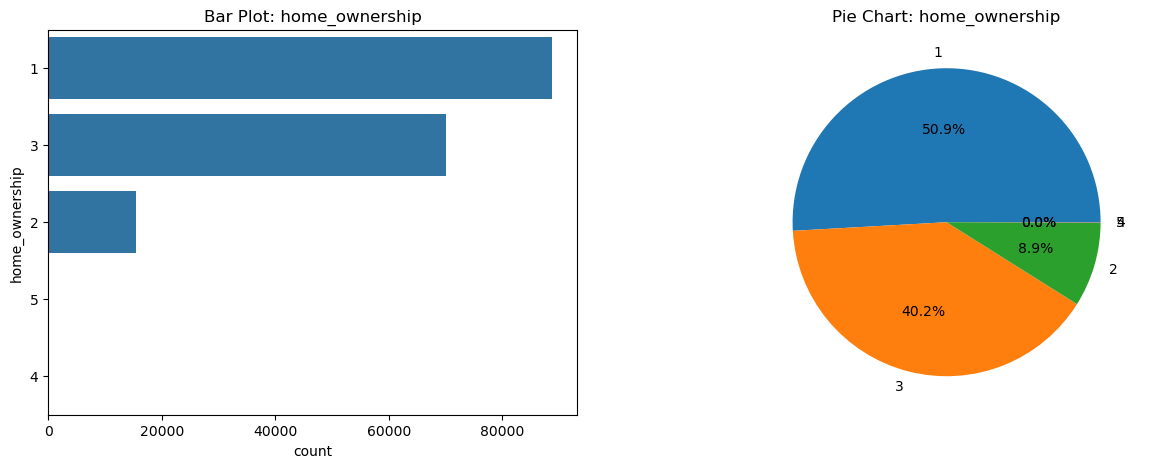

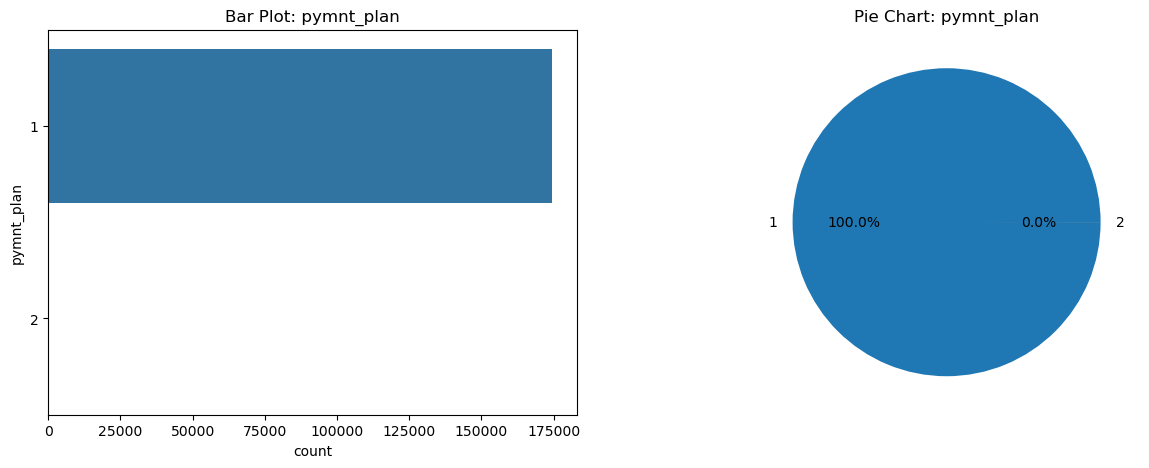

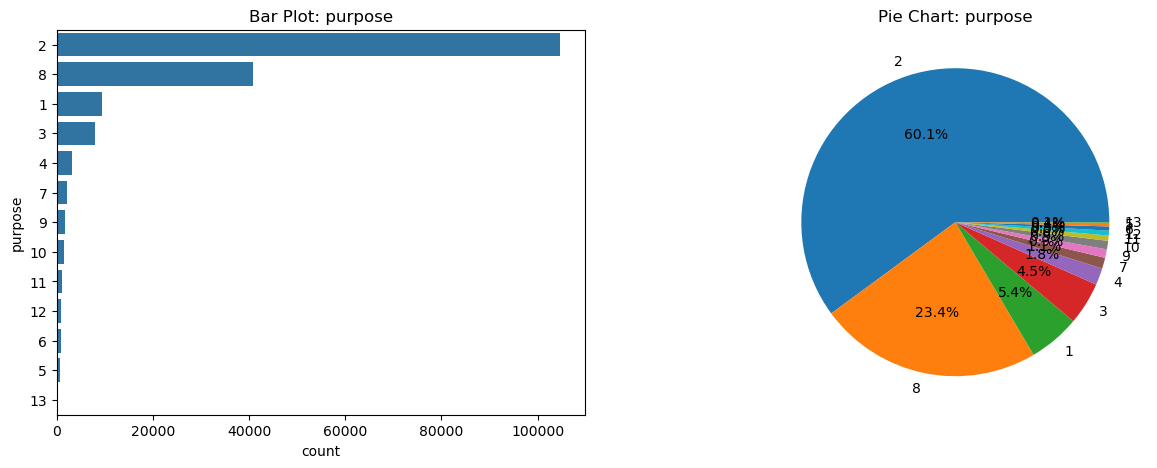

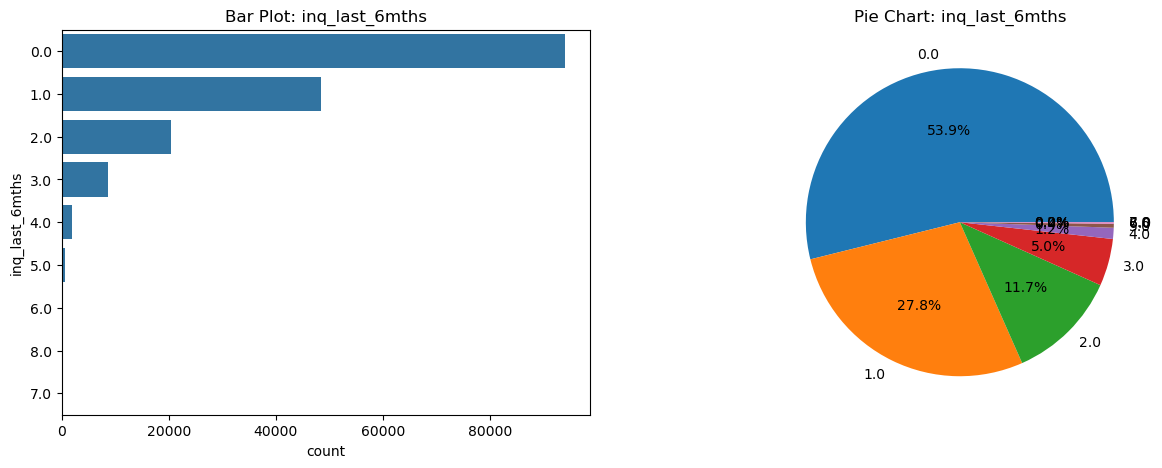

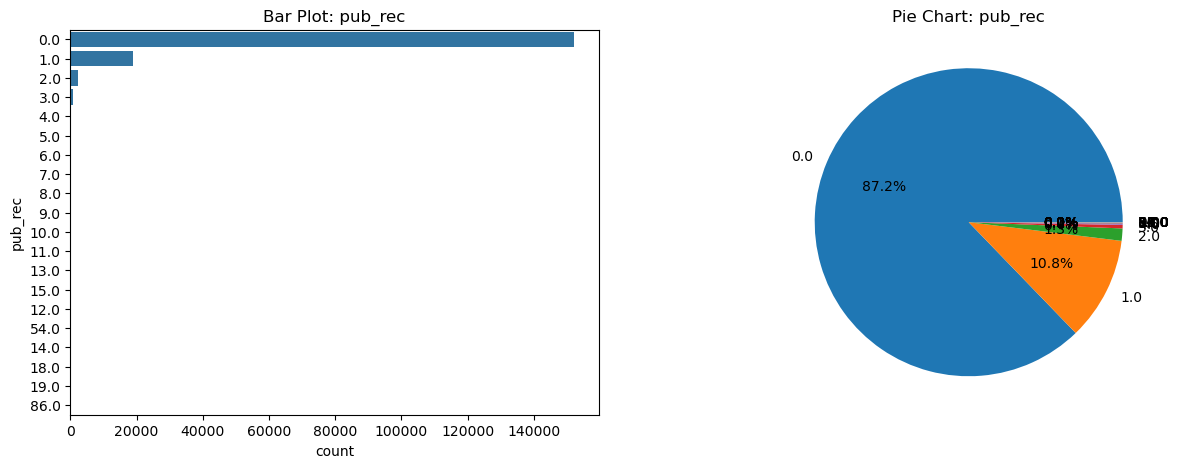

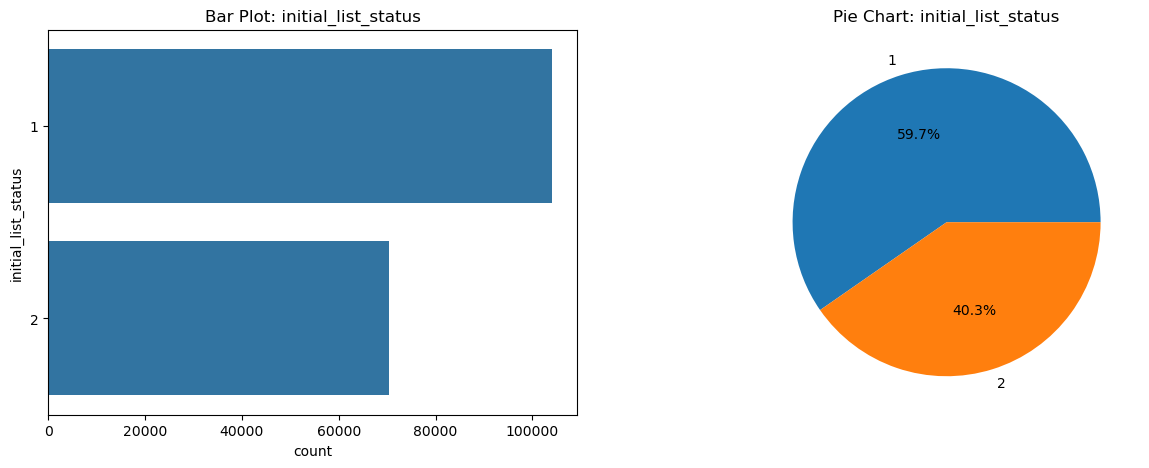

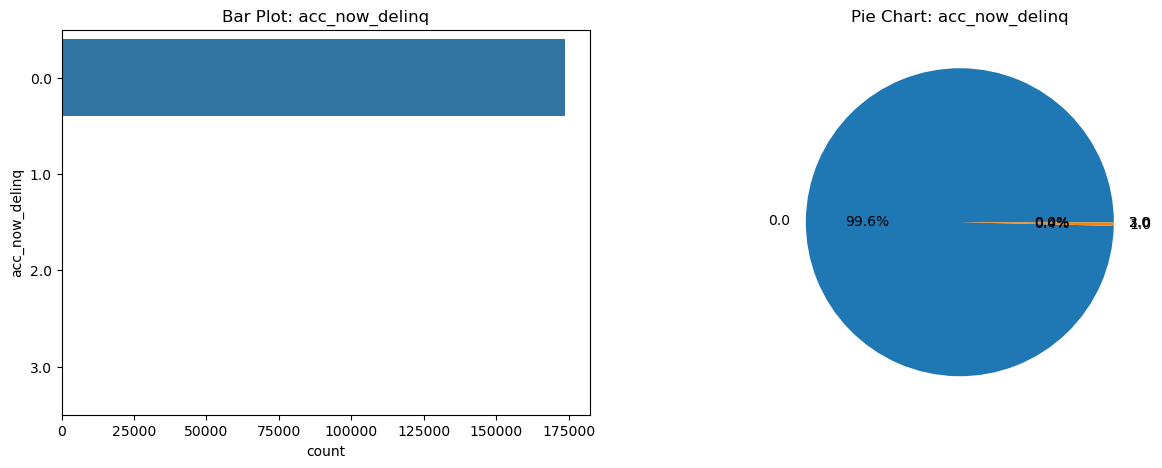

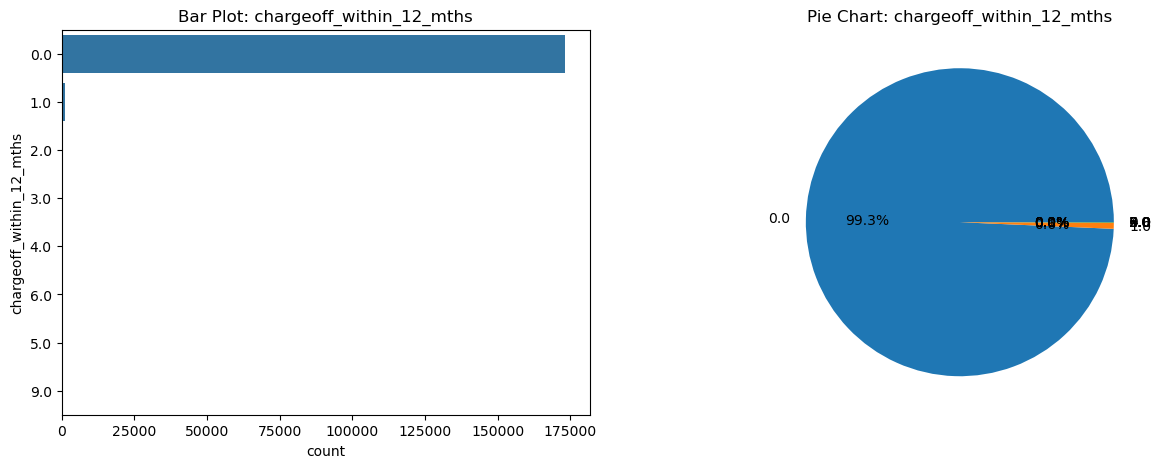

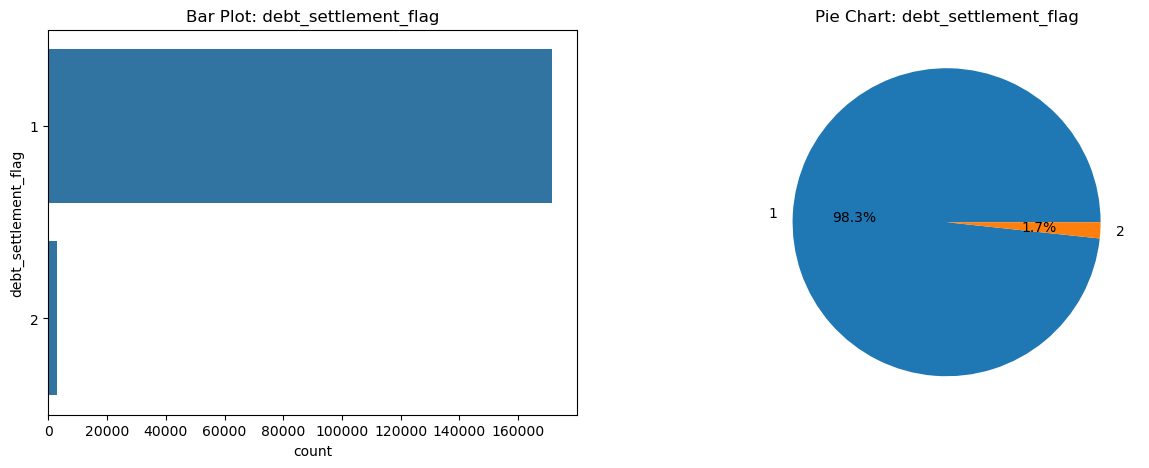

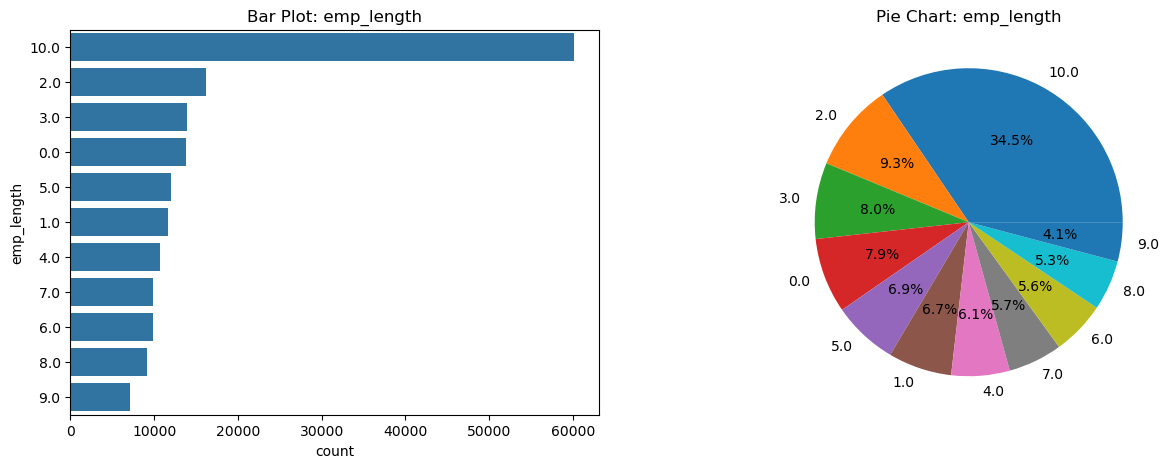

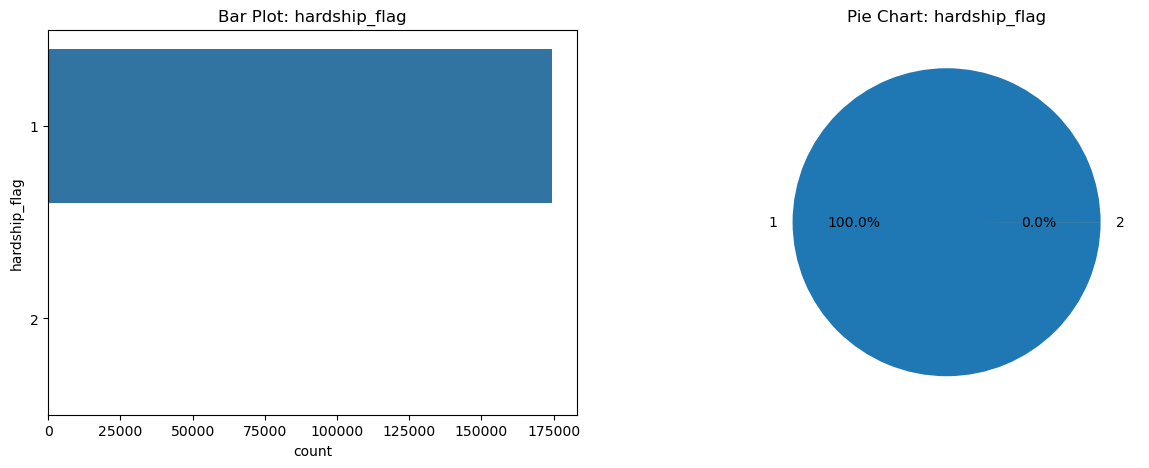

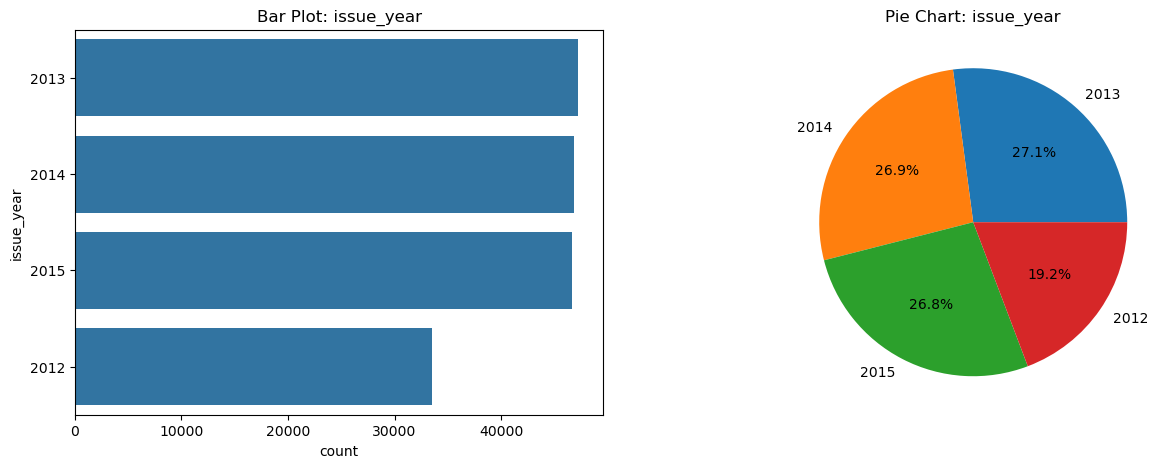

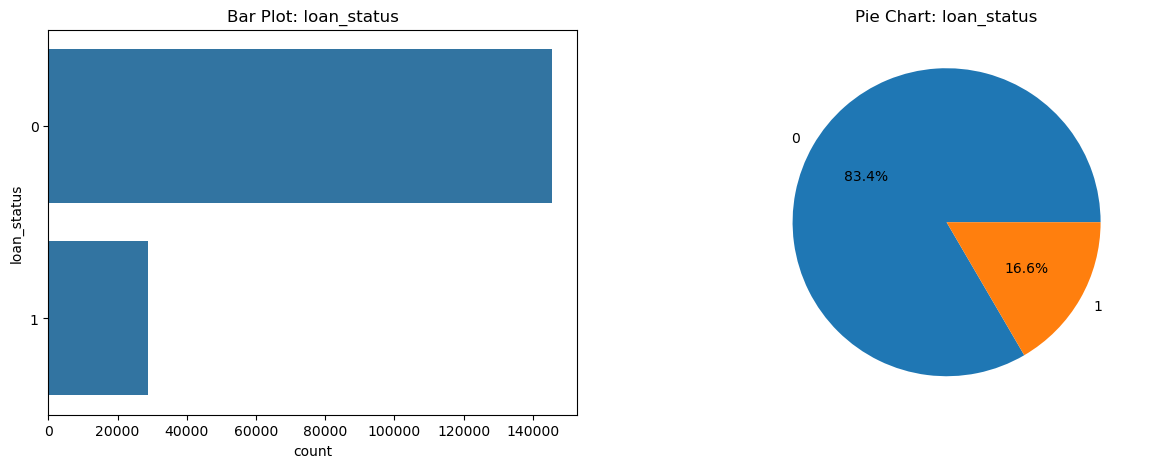

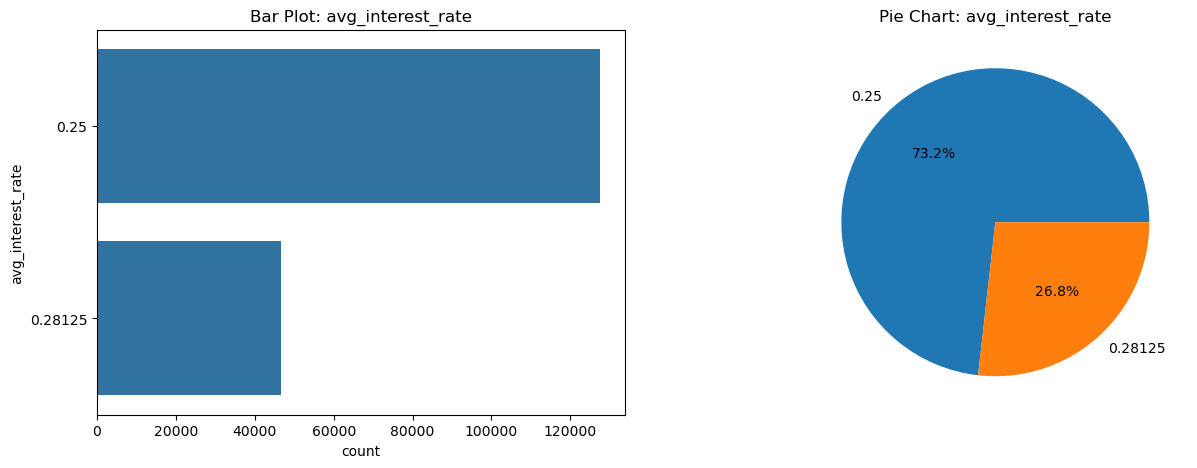

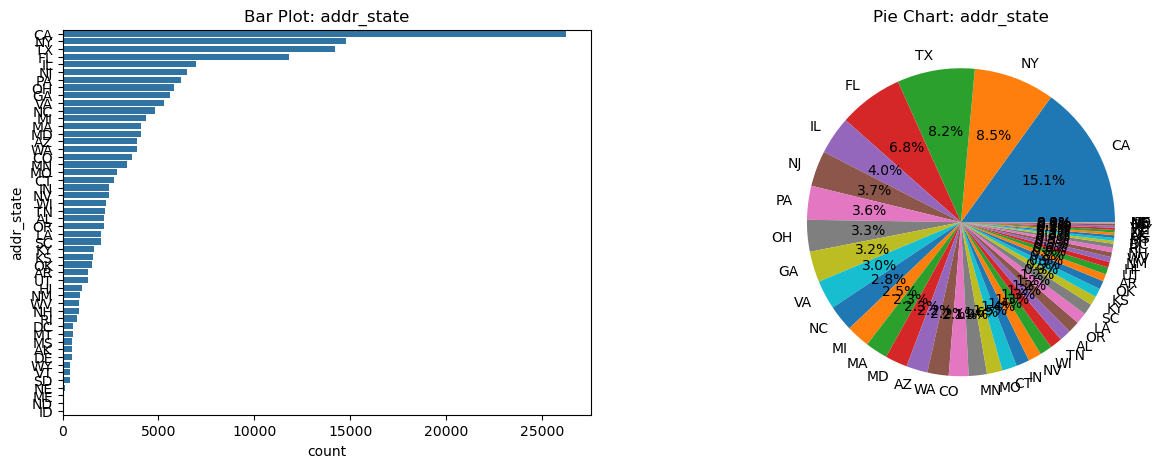

In [96]:
# generate univariate data analysis for categoricals
eda_categorical_visualization(df_disc)

#### Multivariate Data Analysis

In [97]:
# create a new dataframe with "loan_status"
df_num_transformed_loanstatus = df_num_transformed.copy()
df_num_transformed_loanstatus["loan_status"] = df["loan_status"]
df_num_transformed_loanstatus

loan_amnt  revol_bal  total_acc  recoveries  last_fico_range_high  \
0         35000.0  10.950421       33.0    0.000000                 779.0   
1          4925.0   8.297045       14.0    5.728215                 594.0   
2         31200.0  10.185240       29.0    0.000000                 779.0   
3          5400.0  10.180551       32.0    0.000000                 594.0   
4         17500.0   9.786504       24.0    0.000000                 689.0   
...           ...        ...        ...         ...                   ...   
174274     5000.0   8.587279       19.0    0.000000                 529.0   
174275    16000.0   9.704732       25.0    0.000000                 664.0   
174276    12000.0   0.000000       27.0    0.000000                 804.0   
174277    24000.0  10.932607       25.0    0.000000                 679.0   
174278    21000.0  11.844665       44.0    0.000000                 714.0   

        last_fico_range_low  acc_open_past_24mths  num_bc_sats  annual_inc  \
0                  6.654153              1.098612     1.386294   11.965281   
1                  6.381816              0.000000     1.386294   10.545368   
2                  6.654153              1.791759     2.079442   11.440366   
3                  6.381816              1.791759     1.609438   11.608245   
4                  6.530878              1.791759     1.945910   10.714440   
...                     ...                   ...          ...         ...   
174274             6.265301              1.791759     1.386294   11.350418   
174275             6.493754              1.386294     1.386294   10.932160   
174276             6.685861              1.386294     1.609438   10.691968   
174277             6.516193              0.693147     1.098612   11.695255   
174278             6.566672              0.693147     1.386294   11.775297   

          dti  ...  Percent Uninsured  Poverty Rate  \
0       14.67  ...               17.9          17.0   
1        3.51  ...               20.1          17.1   
2       10.40  ...               17.9          17.0   
3       23.23  ...               17.9          17.0   
4       14.51  ...               12.7          10.8   
...       ...  ...                ...           ...   
174274  13.37  ...                9.6          14.5   
174275  31.08  ...               10.8          17.4   
174276  15.22  ...                7.1          15.4   
174277  15.02  ...               17.1          15.9   
174278  32.88  ...                6.1          15.8   

        implicit_regional_price_deflator  \
0                                    2.0   
1                                    2.1   
2                                    2.0   
3                                    2.0   
4                                    2.0   
...                                  ...   
174274                              -1.1   
174275                               0.1   
174276                               0.8   
174277                               0.0   
174278                              -1.7   

        state_per_capital_personal_consumption_expenditurespce  \
0                                                     3.2        
1                                                     2.6        
2                                                     3.2        
3                                                     3.2        
4                                                     2.3        
...                                                   ...        
174274                                                2.2        
174275                                                2.6        
174276                                                2.4        
174277                                                2.4        
174278                                                3.2        

        state_total_employment_growth  regional_price_parities_rpps_all_items  \
0                                 3.4                                 109.649   
1

In [98]:
# get the column names
names = df_num_transformed.columns
names

Index(['loan_amnt', 'revol_bal', 'total_acc', 'recoveries',
       'last_fico_range_high', 'last_fico_range_low', 'acc_open_past_24mths',
       'num_bc_sats', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high',
       'installment', 'revol_util',
       'Population 25 years and over with Bachelor degree or higher',
       'Percent Uninsured', 'Poverty Rate', 'implicit_regional_price_deflator',
       'state_per_capital_personal_consumption_expenditurespce',
       'state_total_employment_growth',
       'regional_price_parities_rpps_all_items', 'state_gdp_growth__summary_',
       'state_real_per_capita_personal_income', 'unemployment_rate'],
      dtype='object')

In [99]:
# convert the variables in the dataframe to numpy array
X = np.array(df_num_transformed)
X = X.T

#### Pairwise scatter plots 

In [100]:
def pairwise_scatter_high_corr(df, hue=None, palette=None, threshold=0.5):
    """
    Generates scatter plots for highly correlated numeric columns.

    Parameters:
    - df: Pandas DataFrame containing numerical columns.
    - hue: Column name for categorical variable used for coloring (optional).
    - palette: Dictionary or list of colors for hue categories (optional).
    - threshold: Minimum absolute correlation value to include the pair in scatter plots.

    Returns:
    - A grid of scatter plots for highly correlated variable pairs.
    """
    numeric_cols = df.select_dtypes(include=['number'])
    corr_matrix = numeric_cols.corr().abs()  # Absolute correlation

    # Extract highly correlated pairs
    high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns 
                       if col1 != col2 and corr_matrix.loc[col1, col2] > threshold]

    high_corr_pairs = list(set([tuple(sorted(pair)) for pair in high_corr_pairs]))  # Remove duplicates

    n_pairs = len(high_corr_pairs)
    n_cols = 3  # Number of columns per row
    n_rows = -(-n_pairs // n_cols)  # Ceiling division for rows

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
    axes = axes.flatten()

    for idx, (x_col, y_col) in enumerate(high_corr_pairs):
        ax = axes[idx]
        sns.scatterplot(ax=ax, x=df[x_col], y=df[y_col], hue=df[hue] if hue else None, palette=palette, s=1)
        ax.set_xlabel(x_col, fontsize=9)
        ax.set_ylabel(y_col, fontsize=9)
        ax.tick_params(axis='both', labelsize=8)
        if hue:
            ax.legend(title=hue, fontsize=7)

    # Remove empty subplots if necessary
    for i in range(idx + 1, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

C:\Users\teppe\AppData\Local\Temp\ipykernel_30212\451232352.py:43: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\teppe\anaconda3\envs\test_env\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


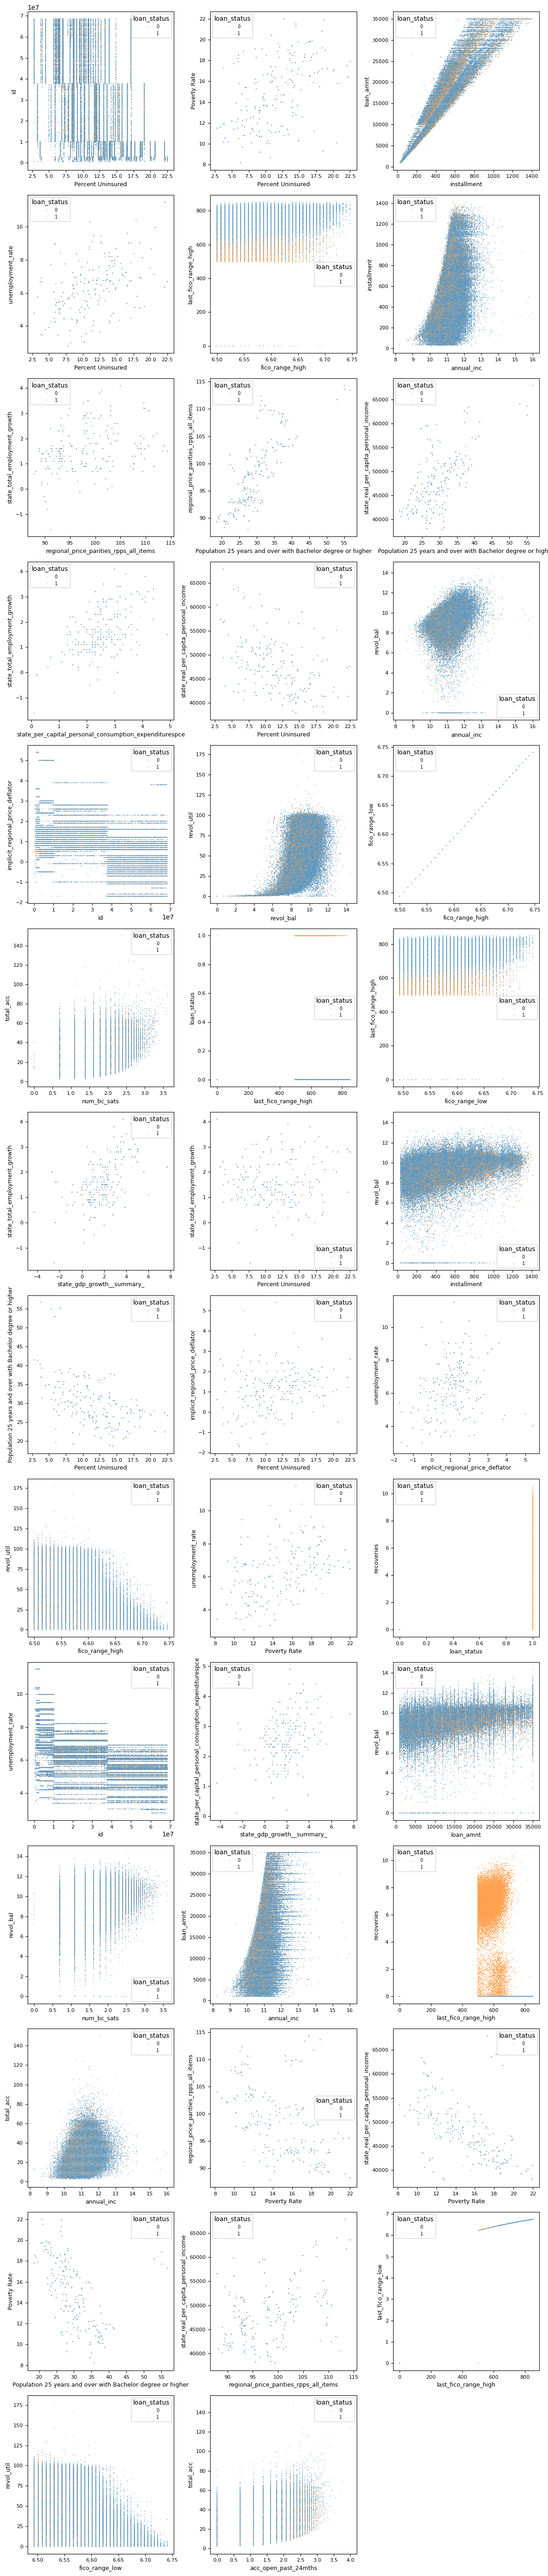

In [40]:
# create a new dataframe with "loan_status"
df_num_transformed_loanstatus = df_num_transformed.copy()
df_num_transformed_loanstatus["loan_status"] = df["loan_status"]

pairwise_scatter_high_corr(df_num_transformed_loanstatus, hue="loan_status", threshold=0.3)

### Check Outliers

In [101]:
# define a function to detect outliers using Tukey's Fences
def detect_outliers_iqr(data):
    """
    Detects outliers using the IQR (Interquartile Range) method (Tukey's Fences).
    
    Parameters:
    - data: Pandas Series (a single column of a DataFrame)
    
    Returns:
    - A boolean mask where True indicates an outlier
    """
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

In [102]:
# define a function to add outlier flag to the original dataset
def add_outlier_flag(df):
    """
    Adds an 'outlier_flag' column to the DataFrame indicating if a row contains at least one outlier.
    
    Parameters:
    - df: Pandas DataFrame
    
    Returns:
    - A modified DataFrame with an 'outlier_flag' column.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns  # Select numeric columns
    outlier_mask = df[numeric_cols].apply(detect_outliers_iqr)  # Apply outlier detection
    df['outlier_flag'] = outlier_mask.any(axis=1)  # Flag rows with at least one outlier
    return df

In [103]:
# copy the original datafram to add outliers
df_outlier = df_num_transformed_loanstatus.copy()

# add outlier flag to the dataframe
add_outlier_flag(df_outlier)

# Display flagged rows
df_outlier[df_outlier['outlier_flag']]

loan_amnt  revol_bal  total_acc  recoveries  last_fico_range_high  \
0         35000.0  10.950421       33.0    0.000000                 779.0   
1          4925.0   8.297045       14.0    5.728215                 594.0   
5         11500.0   2.944439       23.0    0.000000                 814.0   
6          5000.0   8.434246       18.0    0.000000                 814.0   
7          5000.0   8.679482       13.0    0.000000                 664.0   
...           ...        ...        ...         ...                   ...   
174270    20000.0   9.846758       41.0    0.000000                 764.0   
174271     9650.0   7.138867       27.0    0.000000                 629.0   
174274     5000.0   8.587279       19.0    0.000000                 529.0   
174276    12000.0   0.000000       27.0    0.000000                 804.0   
174278    21000.0  11.844665       44.0    0.000000                 714.0   

        last_fico_range_low  acc_open_past_24mths  num_bc_sats  annual_inc  \
0                  6.654153              1.098612     1.386294   11.965281   
1                  6.381816              0.000000     1.386294   10.545368   
5                  6.698268              1.609438     1.609438   11.849405   
6                  6.698268              0.693147     1.945910   11.116321   
7                  6.493754              1.791759     1.098612   11.055656   
...                     ...                   ...          ...         ...   
174270             6.634633              1.791759     0.693147   11.998212   
174271             6.439350              0.000000     1.386294   11.002117   
174274             6.265301              1.791759     1.386294   11.350418   
174276             6.685861              1.386294     1.609438   10.691968   
174278             6.566672              0.693147     1.386294   11.775297   

          dti  ...  Poverty Rate  implicit_regional_price_deflator  \
0       14.67  ...          17.0                               2.0   
1        3.51  ...          17.1                               2.1   
5        6.76  ...          17.0                               2.0   
6        1.77  ...          17.0                               2.0   
7       23.28  ...          19.2                               3.6   
...       ...  ...           ...                               ...   
174270  15.56  ...          13.6                              -0.6   
174271   7.00  ...          11.5                               0.6   
174274  13.37  ...          14.5                              -1.1   
174276  15.22  ...          15.4                               0.8   
174278  32.88  ...          15.8                              -1.7   

        state_per_capital_personal_consumption_expenditurespce  \
0                                                     3.2        
1                                                     2.6        
5                                                     3.2        
6                                                     3.2        
7                                                     2.2        
...                                                   ...        
174270                                                3.1        
174271                                                3.0        
174274                                                2.2        
174276                                                2.4        
174278                                                3.2        

        state_total_employment_growth  regional_price_parities_rpps_all_items  \
0                                 3.4                                 109.649   
1                                 2.1                                 101.046   
5                                 3.4                                 109.649   
6                                 3.4                                 109.649   
7                                 1.1                                  95.243   
...                       

In [44]:
# drop the outliers
#df_transformed_dropoutlier = df_outlier[df_outlier['outlier_flag']==0]
#df_transformed_dropoutlier

In [105]:
# export to csv
df_processed.to_csv("Final_v2_processed.csv", index=False)